In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import requests
import time

In [2]:
#Read initial dataset for Heart Disease and Stroke Mortality in the US from 1999-2019
heart_study = pd.read_csv("Resources/Rates_and_Trends_in_Heart_Disease_and_Stroke_Mortality_Among_US_Adults__35___by_County__Age_Group__Race_Ethnicity__and_Sex___2000-2019.csv",dtype={"Year": "str"})

In [3]:
# View first 5 rows of our data
heart_study.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


In [4]:
# View columns and determine which are insignificant
heart_study.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [5]:
# Dropping columns our group determined is insignificant to our analysis
heart_study.drop(["GeographicLevel",
                  "DataSource",
                  "Class",
                  "Data_Value_Unit",
                  "Data_Value_Type",
                  "Data_Value_Footnote_Symbol",
                  "Data_Value_Footnote",
                  "StratificationCategory1",
                  "StratificationCategory2",
                  "StratificationCategory3",
                  "LocationID"], axis = 1, inplace = True)

# Renaming columns accordingly
heart_study.rename(columns={
    "LocationAbbr": "State",
    "LocationDesc": "County",
    "Stratification1": "Age Group",
    "Stratification2": "Ethnicity",
    "Stratification3": "Sex"
},
    inplace=True)

heart_study.head()

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
0,1999,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


In [6]:
heart_study.shape

(5770240, 10)

In [7]:
heart_study["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017', '1999 - 2010',
       '2010 - 2019'], dtype=object)

In [8]:
# Dropping rows containing "1999-2010" and "2010-2019"
heart_study_cleaned = heart_study[(heart_study.Year != "1999 - 2010") & (heart_study.Year != "2010 - 2019")]
heart_study_cleaned["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017'], dtype=object)

In [9]:
# Dropping rows that contain missing values
heart_study_cleaned = heart_study_cleaned.dropna(0)

heart_study_cleaned

/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
53,2016,AL,Autauga,All stroke,25.7,21.3,30.9,Ages 35-64 years,Overall,Overall
79,2011,AL,Autauga,All stroke,29.5,22.9,39.7,Ages 35-64 years,Overall,Men
106,2017,AL,Autauga,All stroke,33.6,25.4,44.1,Ages 35-64 years,Overall,Men
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...
5268494,2006,WY,Weston,Heart failure,589.3,465.9,704.8,Ages 65 years and older,White,Overall
5268495,2013,WY,Weston,Heart failure,474.9,403.2,551.1,Ages 65 years and older,White,Overall
5268496,2004,WY,Weston,Heart failure,600.2,466.8,706.1,Ages 65 years and older,White,Overall
5268497,2005,WY,Weston,Heart failure,594.9,458.2,719.7,Ages 65 years and older,White,Overall


In [10]:
# US Averages by year
heart_study_year = heart_study_cleaned.loc[(heart_study_cleaned["Topic"] == "All heart disease") & 
                                           (heart_study_cleaned["Sex"] == "Overall") & 
                                           (heart_study_cleaned["Ethnicity"] == "Overall"), :]
heart_study_year

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall
110,2019,AL,Autauga,All heart disease,122.6,106.4,143.4,Ages 35-64 years,Overall,Overall
111,2006,AL,Autauga,All heart disease,164.0,142.5,194.0,Ages 35-64 years,Overall,Overall
112,2003,AL,Autauga,All heart disease,159.6,137.4,189.5,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...
5267778,2007,WY,Weston,All heart disease,1045.1,932.3,1187.5,Ages 65 years and older,Overall,Overall
5267779,2010,WY,Weston,All heart disease,987.0,861.6,1098.7,Ages 65 years and older,Overall,Overall
5267780,2006,WY,Weston,All heart disease,1111.5,978.9,1259.0,Ages 65 years and older,Overall,Overall
5267781,2011,WY,Weston,All heart disease,933.5,814.8,1058.7,Ages 65 years and older,Overall,Overall


In [11]:
heart_study_year['Age Group'] = heart_study_year['Age Group'].replace({'Ages 35-64 years': 'Ages 35 years and older',
                                           'Ages 65 years and older': 'Ages 35 years and older'})
heart_study_year

/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35 years and older,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35 years and older,Overall,Overall
110,2019,AL,Autauga,All heart disease,122.6,106.4,143.4,Ages 35 years and older,Overall,Overall
111,2006,AL,Autauga,All heart disease,164.0,142.5,194.0,Ages 35 years and older,Overall,Overall
112,2003,AL,Autauga,All heart disease,159.6,137.4,189.5,Ages 35 years and older,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...
5267778,2007,WY,Weston,All heart disease,1045.1,932.3,1187.5,Ages 35 years and older,Overall,Overall
5267779,2010,WY,Weston,All heart disease,987.0,861.6,1098.7,Ages 35 years and older,Overall,Overall
5267780,2006,WY,Weston,All heart disease,1111.5,978.9,1259.0,Ages 35 years and older,Overall,Overall
5267781,2011,WY,Weston,All heart disease,933.5,814.8,1058.7,Ages 35 years and older,Overall,Overall


In [12]:
# Group by year, state, county, and age group to find any patterns
heart_study_state = heart_study_year.groupby(['Year','State', 'County', 'Age Group']).sum().reset_index()

heart_study_state

,Year,State,County,Age Group,Data_Value,Confidence_limit_Low,Confidence_limit_High
0,1999,AK,Aleutians East,Ages 35 years and older,38.7,26.5,59.8
1,1999,AK,Aleutians West,Ages 35 years and older,30.1,16.1,54.9
2,1999,AK,Anchorage,Ages 35 years and older,1418.9,1259.9,1597.8
3,1999,AK,Bethel,Ages 35 years and older,1355.6,1139.6,1681.9
4,1999,AK,Denali,Ages 35 years and older,83.3,59.4,120.4
...,...,...,...,...,...,...,...
64606,2019,WY,Sweetwater,Ages 35 years and older,1160.8,1024.2,1326.1
64607,2019,WY,Teton,Ages 35 years and older,759.7,672.0,855.7
64608,2019,WY,Uinta,Ages 35 years and older,1279.9,1112.1,1457.9
64609,2019,WY,Washakie,Ages 35 years and older,1103.2,983.3,1262.5


In [13]:
# create an empty dataframe to store the results
state_year_results = pd.DataFrame(columns=['State', 'Year', 'Mean_Data_Value'])

# group by state and year
grouped_df = heart_study_state.groupby(['State', 'Year'])

# loop through each state-year group
for name, group in grouped_df:
    state = name[0]
    year = name[1]
    county_mean = group.groupby(['County'])['Data_Value'].mean()
    # calculate the mean data value for each county in the state-year group
    state_year_mean = county_mean.mean()
    # add the results to the dataframe
    state_year_results = state_year_results.append({'State': state, 'Year': year, 'Mean_Data_Value': state_year_mean}, ignore_index=True)


state_year_results

,State,Year,Mean_Data_Value
0,AK,1999,1076.709524
1,AK,2000,1164.495238
2,AK,2001,1058.209524
3,AK,2002,948.971429
4,AK,2003,1058.366667
...,...,...,...
1066,WY,2015,1115.413043
1067,WY,2016,1107.908696
1068,WY,2017,1091.300000
1069,WY,2018,1090.778261


In [14]:
#Filtering down to New Jersey only, overall

nj_study = heart_study_cleaned.loc[(heart_study_cleaned["State"] == "NJ") &
                                   (heart_study_cleaned["Ethnicity"] == "Overall"), :]
nj_study

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
2961036,2000,NJ,Bergen,All stroke,9.4,7.9,11.2,Ages 35-64 years,Overall,Women
2961284,2014,NJ,Bergen,All stroke,5.8,5.0,6.9,Ages 35-64 years,Overall,Women
2961313,2015,NJ,Bergen,All stroke,5.4,4.6,6.4,Ages 35-64 years,Overall,Women
2961399,2001,NJ,Bergen,All stroke,8.4,7.2,10.2,Ages 35-64 years,Overall,Women
2961507,1999,NJ,Bergen,All stroke,9.1,7.4,11.0,Ages 35-64 years,Overall,Women
...,...,...,...,...,...,...,...,...,...,...
3005097,2009,NJ,Warren,Heart failure,418.8,362.2,475.4,Ages 65 years and older,Overall,Men
3005098,2001,NJ,Warren,Heart failure,529.1,458.8,603.2,Ages 65 years and older,Overall,Men
3005099,2000,NJ,Warren,Heart failure,569.2,487.7,655.4,Ages 65 years and older,Overall,Men
3005100,2006,NJ,Warren,Heart failure,435.4,385.3,498.0,Ages 65 years and older,Overall,Men


In [15]:
# Viewing data for Topic, which contains our type of condition
nj_study["Topic"].unique()

array(['All stroke', 'Heart failure', 'All heart disease',
       'Coronary heart disease (CHD)', 'Cardiovascular disease (CVD)'],
      dtype=object)

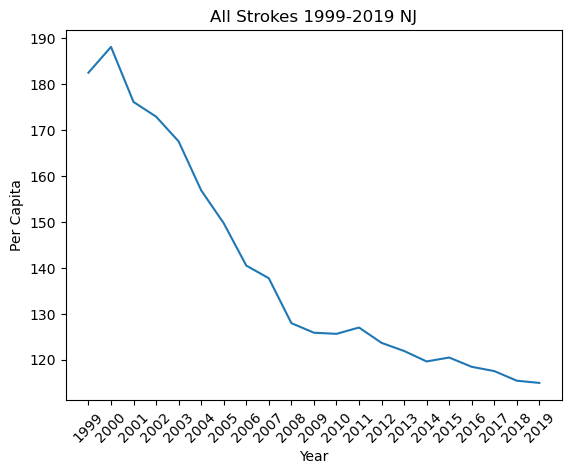

In [16]:
# Strokes in NJ from 1999-2019

nj_all_stroke = nj_study.loc[nj_study["Topic"] == "All stroke"].groupby("Year").mean()
nj_all_stroke = nj_all_stroke.reset_index()
plt.plot(nj_all_stroke["Year"], nj_all_stroke["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("All Strokes 1999-2019 NJ")
plt.savefig('Charts/SG - All Strokes NJ 1999-2019.png')
plt.show()

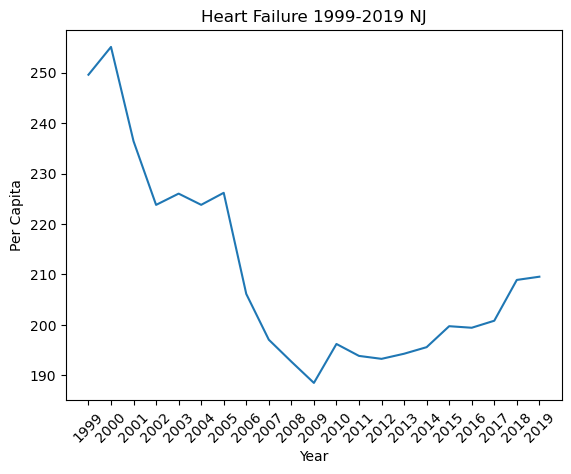

In [17]:
# Heart Failure in NJ from 1999-2019

nj_heart_failure = nj_study.loc[nj_study["Topic"] == "Heart failure"].groupby("Year").mean()
nj_heart_failure = nj_heart_failure.reset_index()
plt.plot(nj_heart_failure["Year"], nj_heart_failure["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Heart Failure 1999-2019 NJ")
plt.savefig('Charts/SG - Heart Failure NJ 1999-2019.png')
plt.show()

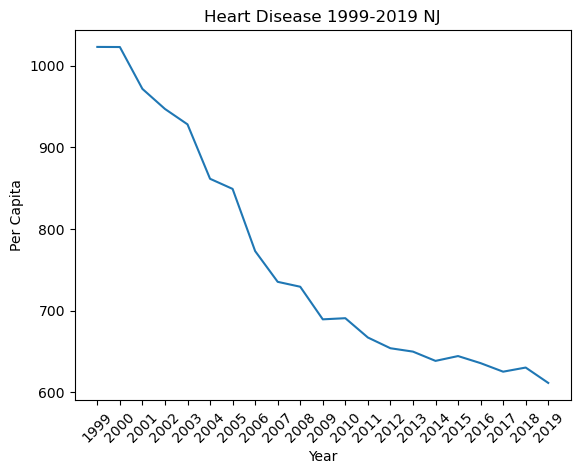

In [18]:
# Heart Disease in NJ from 1999-2019
nj_heart_disease = nj_study.loc[nj_study["Topic"] == "All heart disease"].groupby("Year").mean()
nj_heart_disease = nj_heart_disease.reset_index()
plt.plot(nj_heart_disease["Year"], nj_heart_disease["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Heart Disease 1999-2019 NJ")
plt.savefig('Charts/SG - Heart Disease NJ 1999-2019.png')
plt.show()

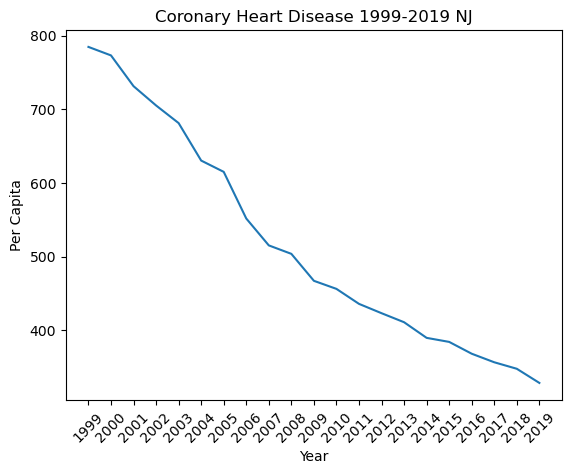

In [19]:
# Coronary heart disease in NJ from 1999 to 2019
nj_coronary = nj_study.loc[nj_study["Topic"] == "Coronary heart disease (CHD)"].groupby("Year").mean()
nj_coronary = nj_coronary.reset_index()
plt.plot(nj_coronary["Year"], nj_coronary["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Coronary Heart Disease 1999-2019 NJ")

plt.savefig('Charts/SG - Coronary Heart Disease NJ 1999-2019.png')
plt.show()

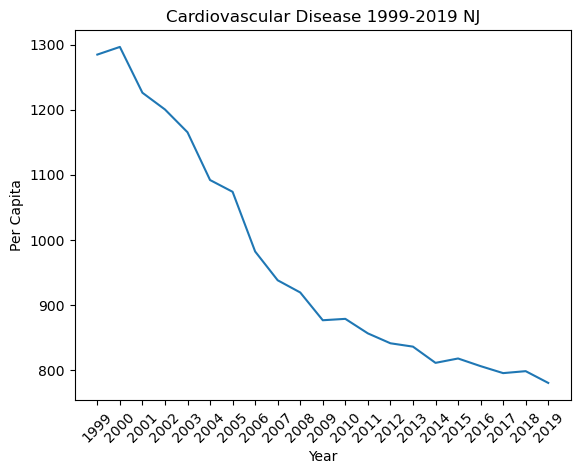

In [20]:
# Cardiovascular disease in NJ from 1999-2019

nj_cardiovascular = nj_study.loc[nj_study["Topic"] == "Cardiovascular disease (CVD)"].groupby("Year").mean()
nj_cardiovascular = nj_cardiovascular.reset_index()
plt.plot(nj_cardiovascular["Year"], nj_cardiovascular["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Cardiovascular Disease 1999-2019 NJ")

plt.savefig('Charts/SG - Cardiovascular Disease NJ 1999-2019.png')
plt.show()

In [21]:
# Breaking averages by county
nj_by_county = nj_study.groupby(["Year", "County"]).mean()["Data_Value"]
nj_by_county

Year  County    
1999  Atlantic      741.006667
      Bergen        642.330000
      Burlington    707.880000
      Camden        723.123333
      Cape May      635.543333
                       ...    
2019  Salem         494.360000
      Somerset      349.176667
      Sussex        426.910000
      Union         360.753333
      Warren        438.080000
Name: Data_Value, Length: 441, dtype: float64

In [22]:
# Reformatting data by county and year
nj_by_county = nj_study.groupby(["Year", "County"]).mean()["Data_Value"]
nj_by_county = nj_by_county.unstack()
nj_by_county = nj_by_county.T

nj_by_county

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,,,,,,,,,,,,
Atlantic,741.006667,802.100000,768.306667,750.036667,765.923333,705.653333,674.213333,594.873333,560.886667,544.436667,...,508.210000,506.046667,479.446667,477.140000,484.996667,490.756667,491.760000,482.546667,479.596667,454.843333
Bergen,642.330000,632.936667,588.116667,585.593333,548.466667,503.983333,498.413333,465.166667,435.990000,433.643333,...,403.103333,384.896667,371.636667,376.856667,362.120000,359.180000,352.096667,343.203333,337.813333,339.313333
Burlington,707.880000,711.336667,674.170000,663.763333,650.206667,612.000000,587.923333,515.093333,506.573333,490.583333,...,457.476667,440.973333,415.640000,406.666667,404.443333,429.040000,415.253333,414.183333,423.340000,420.636667
Camden,723.123333,722.950000,680.156667,669.280000,648.490000,596.856667,586.823333,540.233333,517.400000,502.043333,...,490.220000,492.620000,471.653333,472.196667,459.676667,455.316667,444.843333,451.726667,457.883333,443.516667
Cape May,635.543333,708.906667,680.360000,662.626667,670.926667,627.963333,686.823333,614.496667,565.006667,566.450000,...,533.123333,521.083333,516.050000,517.110000,499.003333,504.356667,514.390000,498.106667,491.683333,464.106667
Cumberland,808.433333,818.343333,791.993333,760.766667,768.050000,728.780000,730.710000,615.376667,573.200000,551.053333,...,544.753333,539.556667,536.413333,539.260000,539.226667,545.923333,538.966667,550.246667,529.860000,518.646667
Essex,695.220000,681.863333,658.393333,645.750000,610.356667,581.116667,563.873333,534.903333,514.160000,517.803333,...,493.110000,472.700000,448.253333,448.473333,415.773333,417.693333,407.296667,383.646667,389.800000,366.023333
Gloucester,718.893333,759.710000,719.690000,718.996667,716.363333,656.106667,654.110000,560.983333,516.093333,509.786667,...,482.623333,483.473333,480.370000,482.696667,466.006667,476.356667,482.740000,490.490000,499.556667,486.710000
Hudson,756.180000,715.266667,686.323333,677.306667,655.630000,636.146667,638.406667,586.680000,554.906667,553.556667,...,488.033333,469.126667,444.183333,440.540000,410.063333,391.683333,378.030000,360.030000,347.150000,327.850000


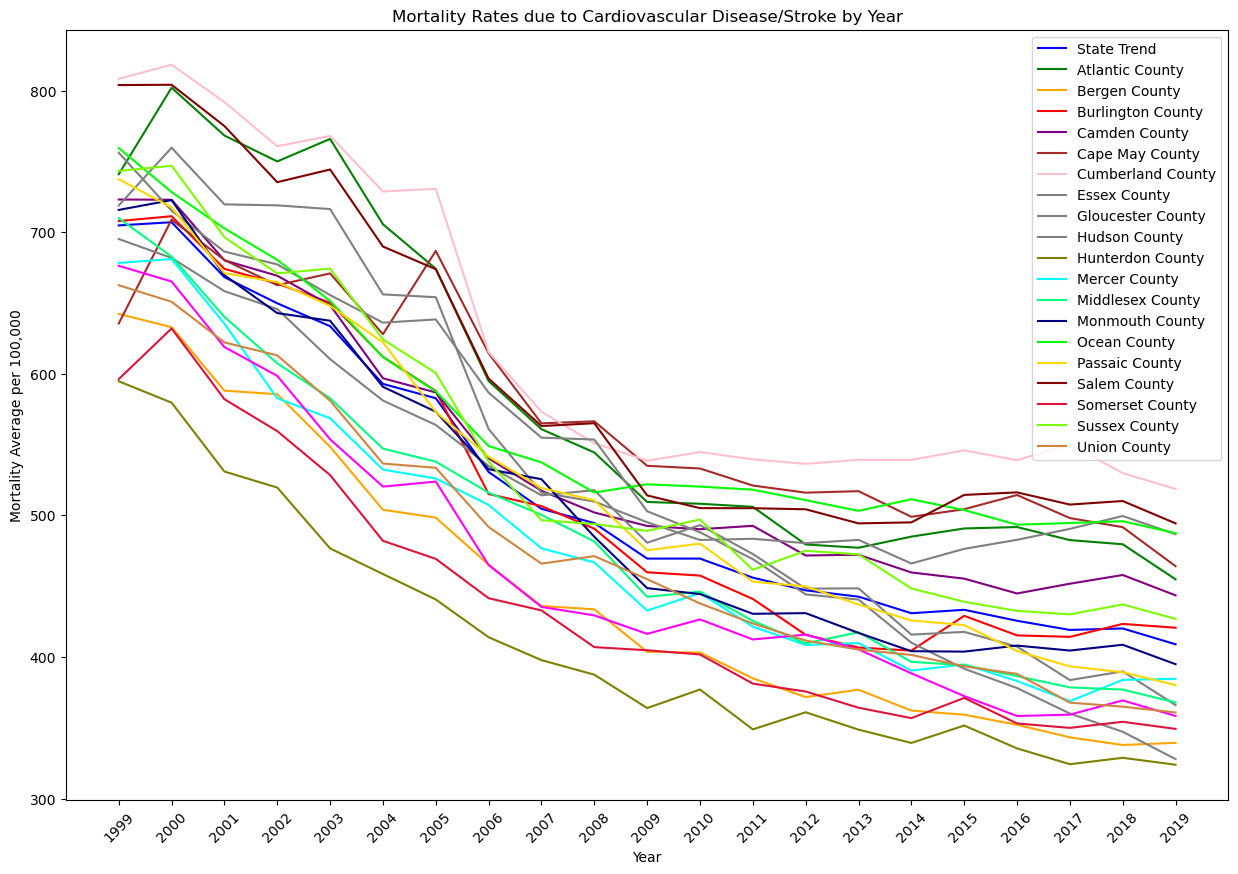

In [23]:
# Plotting data by county

years = nj_by_county.keys()
state_trend = nj_by_county.mean()

plt.figure(figsize=(15,10))
nj_state, = plt.plot(years, state_trend, color="blue", label="State Trend" )

Atlantic, = plt.plot(years, nj_by_county.loc['Atlantic',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="green",label="Atlantic County")
Bergen, = plt.plot(years, nj_by_county.loc['Bergen',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="orange",label="Bergen County")
Burlington, = plt.plot(years, nj_by_county.loc['Burlington',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="red",label="Burlington County")

Camden, = plt.plot(years, nj_by_county.loc['Camden',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="purple",label="Camden County")

CapeMay, = plt.plot(years, nj_by_county.loc['Cape May',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="brown",label="Cape May County")
Cumberland, = plt.plot(years, nj_by_county.loc['Cumberland',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="pink",label="Cumberland County")

Essex, = plt.plot(years, nj_by_county.loc['Essex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Essex County")

Gloucester, = plt.plot(years, nj_by_county.loc['Gloucester',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Gloucester County")

Hudson, = plt.plot(years, nj_by_county.loc['Hudson',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Hudson County")

Hunterdon, = plt.plot(years, nj_by_county.loc['Hunterdon',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="olive",label="Hunterdon County")
Mercer, = plt.plot(years, nj_by_county.loc['Mercer',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="cyan",label="Mercer County")
Middlesex, = plt.plot(years, nj_by_county.loc['Middlesex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="springgreen",label="Middlesex County")
Monmouth, = plt.plot(years, nj_by_county.loc['Monmouth',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="navy",label="Monmouth County")
Morris, = plt.plot(years, nj_by_county.loc['Morris',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="fuchsia",label="Morris County")
Ocean, = plt.plot(years, nj_by_county.loc['Ocean',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="lime",label="Ocean County")
Passaic, = plt.plot(years, nj_by_county.loc['Passaic',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gold",label="Passaic County")
Salem, = plt.plot(years, nj_by_county.loc['Salem',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="maroon",label="Salem County")
Somerset, = plt.plot(years, nj_by_county.loc['Somerset',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="crimson",label="Somerset County")
Sussex, = plt.plot(years, nj_by_county.loc['Sussex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="lawngreen",label="Sussex County")
Union, = plt.plot(years, nj_by_county.loc['Union',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="peru",label="Union County")
plt.legend(handles=[nj_state, Atlantic, Bergen, Burlington, Camden, CapeMay, Cumberland, Essex, Gloucester,
                   Hudson,Hunterdon,Mercer,Middlesex,Monmouth,Ocean,Passaic,Salem,Somerset,Sussex,Union], loc="best")

plt.title("Mortality Rates due to Cardiovascular Disease/Stroke by Year")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)


plt.savefig('Charts/SG - Mortality Rates due to Cardiovascular Disease or Stroke by NJ County 1999-2019.png')
plt.show()

# Import Chronic Disease CSV

In [24]:
# Importing second dataset for chronic disease

chronic_df = pd.read_csv("Resources/U.S._Chronic_Disease_Indicators__CDI_.csv")
chronic_df.head()

/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [25]:
# View columns to see which columns may provide value to our analysis

chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [26]:
# Dropping columns our group determined is insignificant to our analysis

chronic_df.drop(["YearStart",
                 "LocationDesc",
                 "DataSource",
                 "Response",
                 "DataValueFootnoteSymbol",
                 "DatavalueFootnote",
                 "Stratification1",
                 "StratificationCategory2",
                 "Stratification2",
                 "StratificationCategory3",
                 "Stratification3",
                 "ResponseID",
                 "LocationID",
                 "TopicID",
                 "QuestionID",
                 "DataValueTypeID",
                 "StratificationCategoryID1",
                 "StratificationID1",
                 "StratificationCategoryID2",
                 "StratificationID2",
                 "StratificationCategoryID3",
                 "StratificationID3"], axis = 1, inplace = True)

# Renaming columns accordingly
chronic_df.rename(columns={
    "YearEnd": "Year",
    "LocationAbbr": "State",
    "StratificationCategory1": "Ethnicity-Sex"
},
    inplace=True)

chronic_df.head()

,Year,State,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,Ethnicity-Sex,GeoLocation
0,2014,AR,Asthma,Hospitalizations for asthma,NaN,Number,916,916.0,NaN,NaN,Gender,POINT (-92.27449074299966 34.74865012400045)
1,2018,CO,Asthma,Hospitalizations for asthma,NaN,Number,2227,2227.0,NaN,NaN,Overall,POINT (-106.13361092099967 38.843840757000464)
2,2018,DC,Asthma,Hospitalizations for asthma,NaN,Number,708,708.0,NaN,NaN,Overall,POINT (-77.036871 38.907192)
3,2017,GA,Asthma,Hospitalizations for asthma,NaN,Number,3520,3520.0,NaN,NaN,Gender,POINT (-83.62758034599966 32.83968109300048)
4,2010,MI,Asthma,Hospitalizations for asthma,NaN,Number,123,123.0,NaN,NaN,Race/Ethnicity,POINT (-84.71439026999968 44.6613195430005)


In [27]:
# We see there are 55 states for some reason
chronic_df['State'].nunique()

55

In [28]:
# We see there are US territories included as well as data for US fron a national level
chronic_df['State'].unique()

array(['AR', 'CO', 'DC', 'GA', 'MI', 'MT', 'OR', 'PR', 'WI', 'AL', 'ID',
       'IL', 'KS', 'LA', 'MA', 'MD', 'MN', 'MS', 'NC', 'NM', 'TX', 'NY',
       'IN', 'NV', 'SC', 'VA', 'IA', 'UT', 'WY', 'AK', 'CA', 'OH', 'US',
       'HI', 'WA', 'SD', 'DE', 'KY', 'ND', 'RI', 'VI', 'VT', 'AZ', 'FL',
       'NE', 'OK', 'GU', 'NJ', 'MO', 'ME', 'CT', 'NH', 'TN', 'PA', 'WV'],
      dtype=object)

In [29]:
# Remove US terrorities and US rows from our dataset as we are only interested in 50 states plus D.C.

chronic_df.drop(chronic_df.loc[(chronic_df['State']== 'PR') |
                               (chronic_df['State']== 'VI') |
                               (chronic_df['State']== 'GU') |
                               (chronic_df['State']== 'US'), :].index, inplace=True)

chronic_df["State"].nunique()

51

In [30]:
#Adding in the groups for the regions by state and creating a for loop to add them to the dataframe
regions = {
    'Northeast': ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK'],
    'Midwest': ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
    'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']
}

# create a new column in your dataframe called 'State Region'
chronic_df['Region'] = ''

# loop through each state in your dataframe and assign its region to the new column
for state in chronic_df['State'].unique():
    for region, states in regions.items():
        if state in states:
            chronic_df.loc[chronic_df['State'] == state, 'Region'] = region
            break
            
chronic_df

,Year,State,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,Ethnicity-Sex,GeoLocation,Region
0,2014,AR,Asthma,Hospitalizations for asthma,NaN,Number,916,916.0,NaN,NaN,Gender,POINT (-92.27449074299966 34.74865012400045),South
1,2018,CO,Asthma,Hospitalizations for asthma,NaN,Number,2227,2227.0,NaN,NaN,Overall,POINT (-106.13361092099967 38.843840757000464),West
2,2018,DC,Asthma,Hospitalizations for asthma,NaN,Number,708,708.0,NaN,NaN,Overall,POINT (-77.036871 38.907192),South
3,2017,GA,Asthma,Hospitalizations for asthma,NaN,Number,3520,3520.0,NaN,NaN,Gender,POINT (-83.62758034599966 32.83968109300048),South
4,2010,MI,Asthma,Hospitalizations for asthma,NaN,Number,123,123.0,NaN,NaN,Race/Ethnicity,POINT (-84.71439026999968 44.6613195430005),Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,WY,Diabetes,Dilated eye examination among adults aged >= 1...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,POINT (-108.10983035299967 43.23554134300048),West
1185672,2020,WY,Older Adults,Proportion of older adults aged >= 65 years wh...,%,Crude Prevalence,41.5,41.5,38.5,44.6,Race/Ethnicity,POINT (-108.10983035299967 43.23554134300048),West
1185673,2017,IA,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,POINT (-93.81649055599968 42.46940091300047),Midwest
1185674,2020,WY,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,POINT (-108.10983035299967 43.23554134300048),West


In [31]:
smoking_df = chronic_df.loc[(chronic_df["Topic"] == "Tobacco") &
                            (chronic_df["Question"] == "Current smoking among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
smoking_df = smoking_df.groupby(["Year", "State","Region"]).mean().reset_index()

smoking_df

,Year,State,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,AK,West,22.9,21.0,25.0
1,2011,AL,South,24.3,22.9,25.8
2,2011,AR,South,27.0,24.8,29.2
3,2011,AZ,West,19.3,17.3,21.4
4,2011,CA,West,13.7,12.9,14.4
...,...,...,...,...,...,...
556,2021,VT,Northeast,14.8,13.5,16.2
557,2021,WA,West,10.7,10.0,11.5
558,2021,WI,Midwest,13.3,12.0,14.7
559,2021,WV,South,22.0,20.7,23.3


In [32]:
diabetes_df = chronic_df.loc[(chronic_df["Topic"] == "Diabetes") &
                            (chronic_df["Question"] == "Prevalence of diagnosed diabetes among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
diabetes_df = diabetes_df.groupby(["Year", "State","Region"]).mean().reset_index()

diabetes_df

,Year,State,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,AK,West,7.9,6.6,9.4
1,2011,AL,South,11.8,10.9,12.7
2,2011,AR,South,11.2,10.1,12.4
3,2011,AZ,West,9.5,8.3,10.8
4,2011,CA,West,8.9,8.4,9.5
...,...,...,...,...,...,...
556,2021,VT,Northeast,8.5,7.6,9.5
557,2021,WA,West,8.7,8.2,9.3
558,2021,WI,Midwest,9.1,8.2,10.1
559,2021,WV,South,15.9,14.9,16.9


In [33]:
obesity_df = chronic_df.loc[(chronic_df["Topic"] == "Nutrition, Physical Activity, and Weight Status") &
                            (chronic_df["Question"] == "Obesity among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
obesity_df = obesity_df.groupby(["Year", "State","Region"]).mean().reset_index()

obesity_df

,Year,State,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,AK,West,27.4,25.3,29.7
1,2011,AL,South,32.0,30.5,33.5
2,2011,AR,South,30.9,28.8,33.1
3,2011,AZ,West,25.1,23.0,27.3
4,2011,CA,West,23.8,22.9,24.7
...,...,...,...,...,...,...
556,2021,VT,Northeast,29.0,27.4,30.7
557,2021,WA,West,28.8,27.7,29.9
558,2021,WI,Midwest,33.9,32.1,35.7
559,2021,WV,South,40.6,39.1,42.1


In [34]:
cardio_df = chronic_df.loc[(chronic_df["Topic"] == "Cardiovascular Disease") &
                            (chronic_df["Question"] == "Mortality from coronary heart disease") &
                            (chronic_df["DataValueUnit"] == "cases per 100,000") &
                            (chronic_df["DataValueType"] == "Crude Rate") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
cardio_df = cardio_df.groupby(["Year", "State","Region"]).mean().reset_index()

cardio_df

,Year,State,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2010,AK,West,54.3,48.9,59.8
1,2010,AL,South,116.3,113.2,119.3
2,2010,AR,South,162.0,157.4,166.7
3,2010,AZ,West,112.5,109.9,115.1
4,2010,CA,West,106.5,105.4,107.5
...,...,...,...,...,...,...
556,2020,VT,Northeast,165.7,155.6,175.8
557,2020,WA,West,90.2,88.1,92.3
558,2020,WI,Midwest,118.6,115.8,121.4
559,2020,WV,South,179.5,173.3,185.7


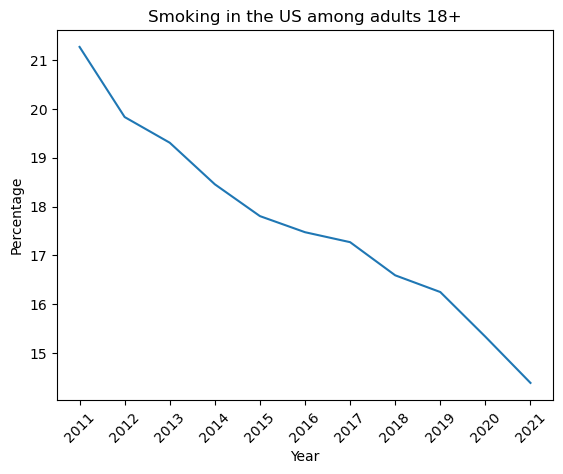

In [35]:
us_smoking = smoking_df.groupby("Year").mean().reset_index()
plt.plot(us_smoking["Year"], us_smoking["DataValueAlt"])
plt.xticks(us_smoking["Year"], rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Smoking in the US among adults 18+")

plt.savefig('Charts/CS - Smoking in the US 2011-2021.png')
plt.show()

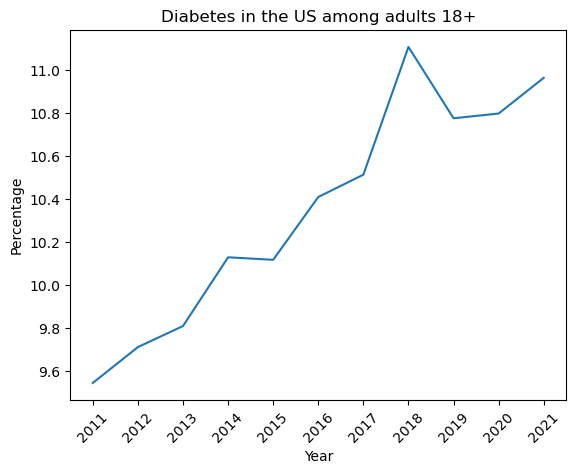

In [36]:
us_diabetes = diabetes_df.groupby("Year").mean().reset_index()
plt.plot(us_diabetes["Year"], us_diabetes["DataValueAlt"])
plt.xticks(us_diabetes["Year"],rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Diabetes in the US among adults 18+")

plt.savefig('Charts/CS - Diabetes in the US 2011-2021.png')
plt.show()

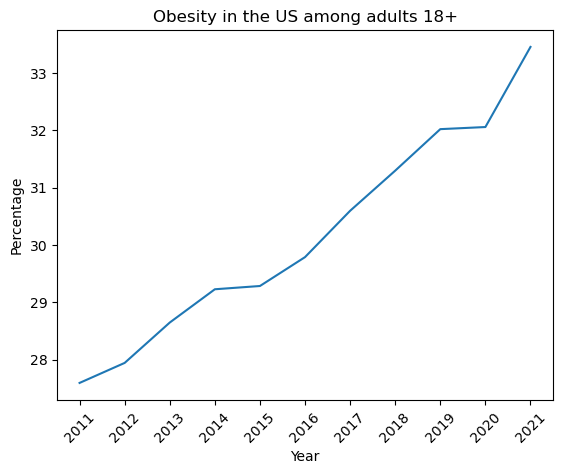

In [37]:
us_obesity = obesity_df.groupby("Year").mean().reset_index()
plt.plot(us_obesity["Year"], us_obesity["DataValueAlt"])
plt.xticks(us_obesity["Year"],rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Obesity in the US among adults 18+")

plt.savefig('Charts/CS - Obesity in the US 2011-2021.png')
plt.show()

In [38]:
smoking_region = smoking_df.groupby(["Year","Region"]).mean().reset_index()
smoking_region

,Year,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,Midwest,22.266667,20.925000,23.641667
1,2011,Northeast,19.322222,18.133333,20.600000
2,2011,South,23.341176,21.817647,24.947059
3,2011,West,18.976923,17.600000,20.438462
4,2012,Midwest,21.058333,19.783333,22.383333
5,2012,Northeast,17.633333,16.488889,18.822222
6,2012,South,22.147059,20.723529,23.611765
7,2012,West,17.192308,15.915385,18.538462
8,2013,Midwest,20.191667,18.966667,21.491667
9,2013,Northeast,17.311111,16.166667,18.533333


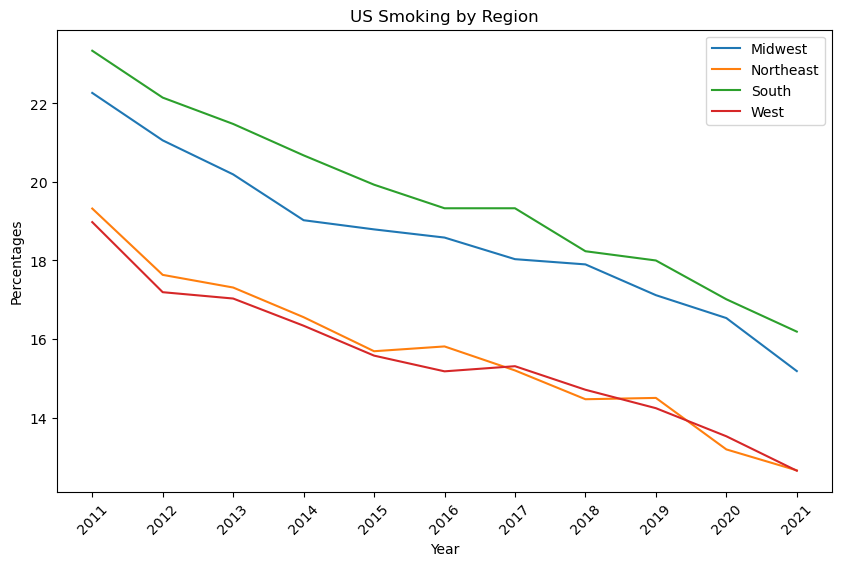

In [39]:
#Making groups for the loop by Region
groups = smoking_region.groupby('Region')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
for name, group in groups:
    ax.plot(group['Year'], group['DataValueAlt'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('US Smoking by Region')

#Adjusting the ticks on the x axis
xticks = list(smoking_region['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)


# Show the legend
ax.legend()

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/CS - US Smoking by Region.png')

In [40]:
#getting the average rate of diabetes by year and region
diabetes_region = diabetes_df.groupby(["Year","Region"]).mean().reset_index()
diabetes_region

,Year,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,Midwest,9.133333,8.391667,9.933333
1,2011,Northeast,8.933333,8.244444,9.688889
2,2011,South,10.864706,9.982353,11.817647
3,2011,West,8.623077,7.776923,9.553846
4,2012,Midwest,9.366667,8.583333,10.183333
5,2012,Northeast,9.166667,8.455556,9.977778
6,2012,South,11.052941,10.194118,11.970588
7,2012,West,8.653846,7.823077,9.546154
8,2013,Midwest,9.416667,8.650000,10.216667
9,2013,Northeast,9.177778,8.433333,9.988889


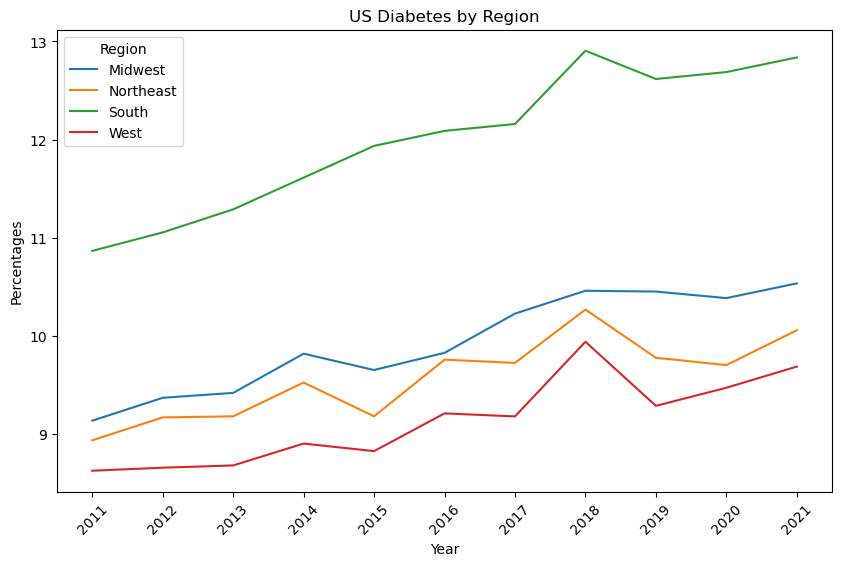

In [41]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
groups2 = diabetes_region.groupby('Region')
for name, group in groups2:
    ax.plot(group['Year'], group['DataValueAlt'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('US Diabetes by Region')

xticks = list(diabetes_region['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Show the legend
ax.legend(title='Region')

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/CS - US Diabetes by Region.png')

In [42]:
#Getting the average by year and region for obesity
obesity_region = obesity_df.groupby(["Year","Region"]).mean().reset_index()
obesity_region

,Year,Region,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,Midwest,28.783333,27.391667,30.225000
1,2011,Northeast,25.422222,24.166667,26.733333
2,2011,South,29.952941,28.394118,31.570588
3,2011,West,24.907692,23.453846,26.469231
4,2012,Midwest,29.358333,27.975000,30.775000
5,2012,Northeast,25.644444,24.400000,26.933333
6,2012,South,30.217647,28.723529,31.758824
7,2012,West,25.246154,23.800000,26.723077
8,2013,Midwest,30.050000,28.650000,31.450000
9,2013,Northeast,26.422222,25.133333,27.766667


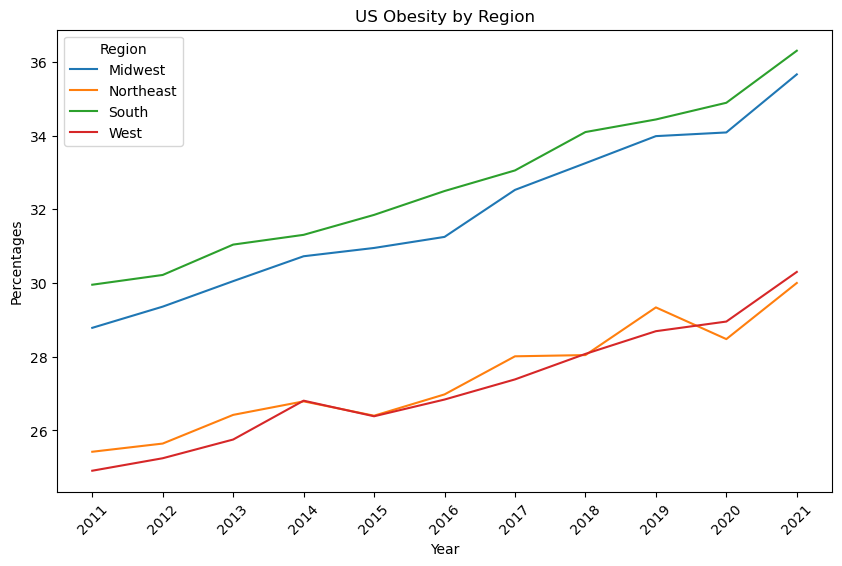

In [43]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
groups3 = obesity_region.groupby('Region')
for name, group in groups3:
    ax.plot(group['Year'], group['DataValueAlt'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('US Obesity by Region')

xticks = list(obesity_region['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Show the legend
ax.legend(title='Region')

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/CS - US Obesity by Region.png')

In [44]:
#Adding in the regions to the original dataframe by making a loop
regions = {
    'Northeast': ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD'],
    'South': ['VA', 'DC', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK'],
    'Midwest': ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
    'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']
}

# create a new column in your dataframe called 'State Region'

state_year_results['Region'] = ''

# loop through each state in your dataframe and assign its region to the new column
for state in state_year_results['State'].unique():
    for region, states in regions.items():
        if state in states:
            state_year_results.loc[state_year_results['State'] == state, 'Region'] = region
            break
            
state_year_results

,State,Year,Mean_Data_Value,Region
0,AK,1999,1076.709524,West
1,AK,2000,1164.495238,West
2,AK,2001,1058.209524,West
3,AK,2002,948.971429,West
4,AK,2003,1058.366667,West
...,...,...,...,...
1066,WY,2015,1115.413043,West
1067,WY,2016,1107.908696,West
1068,WY,2017,1091.300000,West
1069,WY,2018,1090.778261,West


In [45]:
#getting the average data value for each region
heart_study_region = state_year_results.groupby(["Year","Region"]).sum().reset_index()

#Replace empty string values with NaN
heart_study_region['Region'] = heart_study_region['Region'].replace('', np.nan)


# Drop rows with NaN values
heart_study_region = heart_study_region.dropna()

heart_study_region

,Year,Region,Mean_Data_Value
0,1999,Midwest,21677.509482
1,1999,Northeast,20649.774340
2,1999,South,32050.790492
3,1999,West,19941.521441
4,2000,Midwest,20882.039217
...,...,...,...
79,2018,West,13347.685014
80,2019,Midwest,14148.920201
81,2019,Northeast,12414.125774
82,2019,South,20616.236581


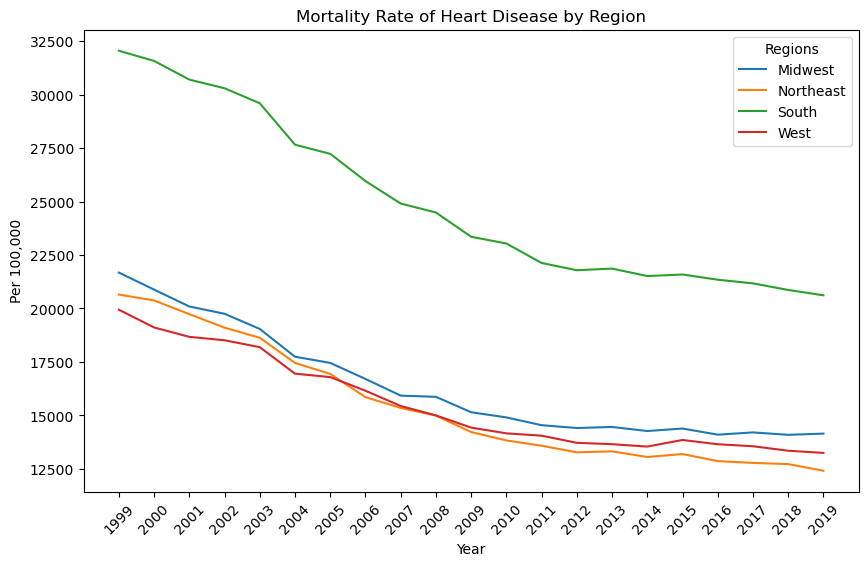

In [79]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
groups4 = heart_study_region.groupby('Region')
for name, group in groups4:
    ax.plot(group['Year'], group['Mean_Data_Value'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Per 100,000')
ax.set_title('Mortality Rate of Heart Disease by Region')

xticks = list(heart_study_region['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Show the legend
ax.legend(title='Regions')

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/CS - Mortality Rate of Heart Disease by Region.png')

In [47]:
#making a filtered dataframe with all the topics to then get the yearly average for each for the US
filtered_df = chronic_df.loc[((chronic_df["Topic"] == "Diabetes") &
                              (chronic_df["Question"] == "Prevalence of diagnosed diabetes among adults aged >= 18 years") &
                              (chronic_df["DataValueType"] == "Crude Prevalence") &
                              (chronic_df["Ethnicity-Sex"] == "Overall")) |
                             ((chronic_df["Topic"] == "Tobacco") &
                              (chronic_df["Question"] == "Current smoking among adults aged >= 18 years") &
                              (chronic_df["DataValueType"] == "Crude Prevalence") &
                              (chronic_df["Ethnicity-Sex"] == "Overall")) |
                             ((chronic_df["Topic"] == "Nutrition, Physical Activity, and Weight Status") &
                              (chronic_df["Question"] == "Obesity among adults aged >= 18 years") &
                              (chronic_df["DataValueType"] == "Crude Prevalence") &
                              (chronic_df["Ethnicity-Sex"] == "Overall"))]

filtered_df

,Year,State,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,Ethnicity-Sex,GeoLocation,Region
529474,2019,AK,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,17.4,17.4,15.3,19.8,Overall,POINT (-147.72205903599973 64.84507995700051),West
530032,2014,AK,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,19.9,19.9,18.2,21.6,Overall,POINT (-147.72205903599973 64.84507995700051),West
530070,2012,AK,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Crude Prevalence,25.7,25.7,23.9,27.5,Overall,POINT (-147.72205903599973 64.84507995700051),West
530100,2011,AK,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Crude Prevalence,27.4,27.4,25.3,29.7,Overall,POINT (-147.72205903599973 64.84507995700051),West
530319,2019,AK,Diabetes,Prevalence of diagnosed diabetes among adults ...,%,Crude Prevalence,7.3,7.3,6.2,8.5,Overall,POINT (-147.72205903599973 64.84507995700051),West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183958,2020,WY,Diabetes,Prevalence of diagnosed diabetes among adults ...,%,Crude Prevalence,8.5,8.5,7.6,9.6,Overall,POINT (-108.10983035299967 43.23554134300048),West
1184022,2018,WY,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,18.8,18.8,17.3,20.4,Overall,POINT (-108.10983035299967 43.23554134300048),West
1184707,2019,WY,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,18.4,18.4,16.7,20.2,Overall,POINT (-108.10983035299967 43.23554134300048),West
1184823,2017,WY,Tobacco,Current smoking among adults aged >= 18 years,%,Crude Prevalence,18.7,18.7,17.2,20.3,Overall,POINT (-108.10983035299967 43.23554134300048),West


In [48]:
#Averaging each datavalue to get it ready to plot
topics_us = filtered_df.groupby(["Year","Question"]).mean().reset_index()
topics_us

,Year,Question,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
0,2011,Current smoking among adults aged >= 18 years,21.266667,19.882353,22.723529
1,2011,Obesity among adults aged >= 18 years,27.592157,26.152941,29.100000
2,2011,Prevalence of diagnosed diabetes among adults ...,9.545098,8.739216,10.421569
3,2012,Current smoking among adults aged >= 18 years,19.831373,18.529412,21.184314
4,2012,Obesity among adults aged >= 18 years,27.941176,26.529412,29.392157
5,2012,Prevalence of diagnosed diabetes among adults ...,9.711765,8.903922,10.580392
6,2013,Current smoking among adults aged >= 18 years,19.305882,18.015686,20.666667
7,2013,Obesity among adults aged >= 18 years,28.645098,27.201961,30.127451
8,2013,Prevalence of diagnosed diabetes among adults ...,9.809804,8.986275,10.698039
9,2014,Current smoking among adults aged >= 18 years,18.454902,17.166667,19.829412


In [80]:
us_year_results = heart_study_region.groupby('Year').mean().reset_index()

us_year_results

,Year,Mean_Data_Value
0,1999,23579.898939
1,2000,22986.174002
2,2001,22300.069011
3,2002,21916.439270
4,2003,21364.806226
5,2004,19951.788005
6,2005,19603.795315
7,2006,18667.811389
8,2007,17905.514284
9,2008,17587.102393


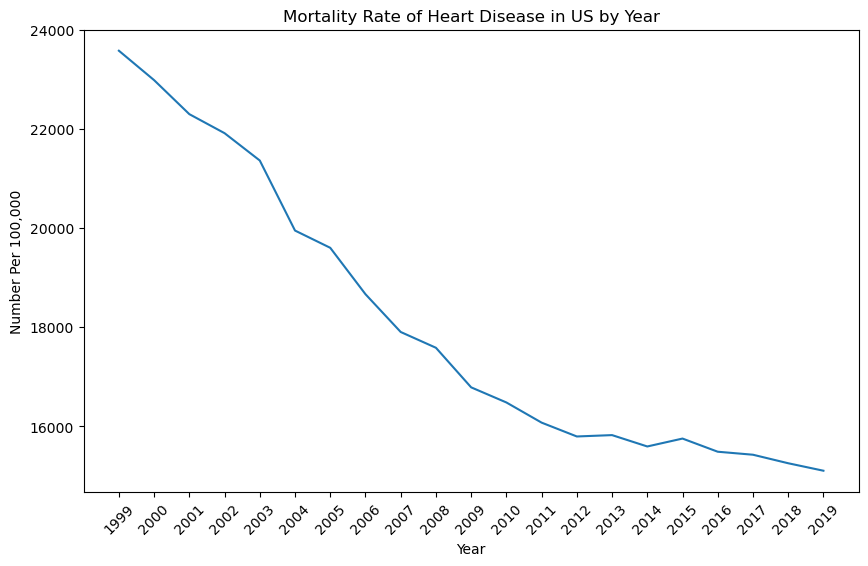

In [81]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(us_year_results['Year'], us_year_results['Mean_Data_Value'])

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number Per 100,000')
ax.set_title('Mortality Rate of Heart Disease in US by Year')

ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/CS - Mortality Rate of Heart Disease in US by Year.png')

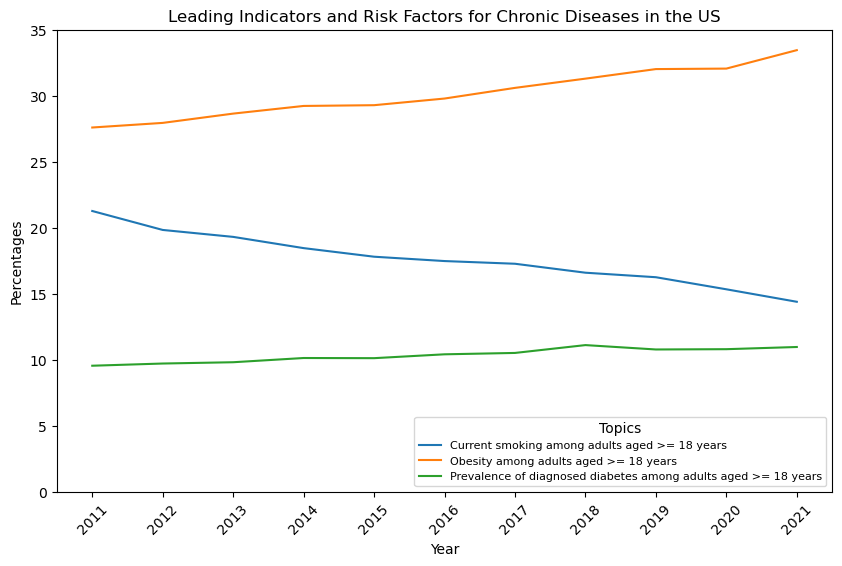

In [51]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each group and plot the data
groups5 = topics_us.groupby('Question')
for name, group in groups5:
    ax.plot(group['Year'], group['DataValueAlt'], label=name)

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentages')
ax.set_title('Leading Indicators and Risk Factors for Chronic Diseases in the US')

xticks = list(topics_us['Year'].unique()) 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])

# Show the legend
ax.legend(title='Topics',loc='lower right', fontsize=8)

# Show the plot
plt.show()

#Saves Graph to folder
fig.savefig('Charts/CS - Leading Indicators and Risk Factors for Chronic Diseases in the US.png')

In [52]:
# Create a dataframe to consolidate the Mortality Rate for the nation by year
heart_study_year = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall") & 
                                                (heart_study_cleaned["Sex"] == "Overall")]
heart_study_year = heart_study_year.groupby(["Year"]).mean()
heart_study_year = heart_study_year.drop(["Confidence_limit_Low", "Confidence_limit_High"], axis=1)
heart_study_year = heart_study_year.reset_index()
heart_study_year

,Year,Data_Value
0,1999,700.612000
1,2000,684.192580
2,2001,663.015043
3,2002,652.106568
4,2003,631.975420
5,2004,590.138575
6,2005,578.539833
7,2006,545.439401
8,2007,523.330919
9,2008,515.268345


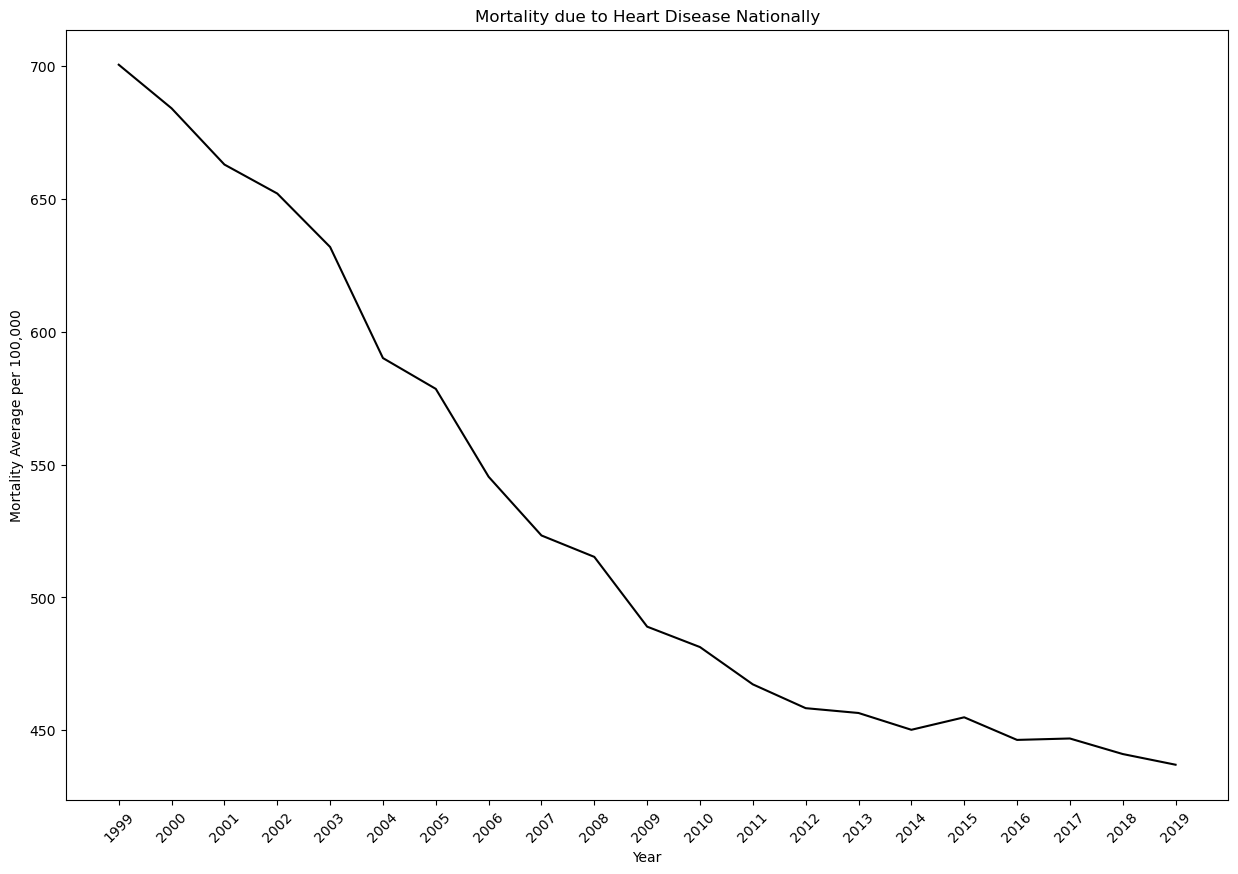

In [53]:
# Create a plot for the national heart disease mortality rate
years = heart_study_year["Year"]

plt.figure(figsize=(15,10))
Overall, = plt.plot(years, heart_study_year["Data_Value"], color = "black", label = "Overall")
plt.title("Mortality due to Heart Disease Nationally")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.savefig('Charts/LG - Mortality due to Heart Disease Nationally.png')
plt.show()

In [54]:
# Confirm ethnicity values
heart_study_cleaned["Ethnicity"].unique()

array(['Overall', 'Black (Non-Hispanic)', 'Hispanic', 'White',
       'American Indian/Alaska Native', 'Asian/Pacific Islander'],
      dtype=object)

In [55]:
# Create ethnicity dataframe
heart_study_ethnicity1 = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] != "Overall") & 
                                                (heart_study_cleaned["Sex"] != "Male") & 
                                                (heart_study_cleaned["Sex"] != "Female")]

heart_by_ethnicity = heart_study_ethnicity1.groupby(["Year", "Ethnicity"]).mean()["Data_Value"]
heart_by_ethnicity = heart_by_ethnicity.unstack()
heart_by_ethnicity = heart_by_ethnicity.T
heart_by_ethnicity


Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ethnicity,,,,,,,,,,,,,,,,,,,,,
American Indian/Alaska Native,309.647124,292.732000,283.469295,285.032152,304.609067,288.035200,276.352419,272.531352,260.070933,245.199238,...,242.620114,245.660952,232.566819,241.305676,242.132419,243.039886,234.399695,236.037981,226.250629,220.062667
Asian/Pacific Islander,260.403617,250.238577,246.055375,234.136996,229.028992,217.828992,211.837098,201.466811,193.126318,189.045035,...,183.093564,166.817710,165.067720,166.616407,158.263653,160.089220,157.034630,156.361303,159.466219,157.021935
Black (Non-Hispanic),664.355559,655.659509,639.191627,629.796558,616.308460,575.330439,557.920869,527.959294,510.274139,487.500370,...,456.197014,434.531299,425.952771,425.300921,419.547762,421.251299,420.164337,418.242186,416.185620,411.326325
Hispanic,308.168737,289.338037,280.159487,276.050911,262.977685,241.658379,243.783680,224.168607,216.656420,206.344947,...,193.237114,183.033957,180.341528,179.032408,177.090427,181.082665,177.554429,175.063067,173.924304,173.623047
White,699.469520,684.061490,662.246393,651.801597,630.943607,589.939607,578.380943,544.842799,522.245088,516.265921,...,482.319793,469.628344,460.871566,458.661463,453.231100,459.045988,450.330107,451.615558,445.766864,442.112896


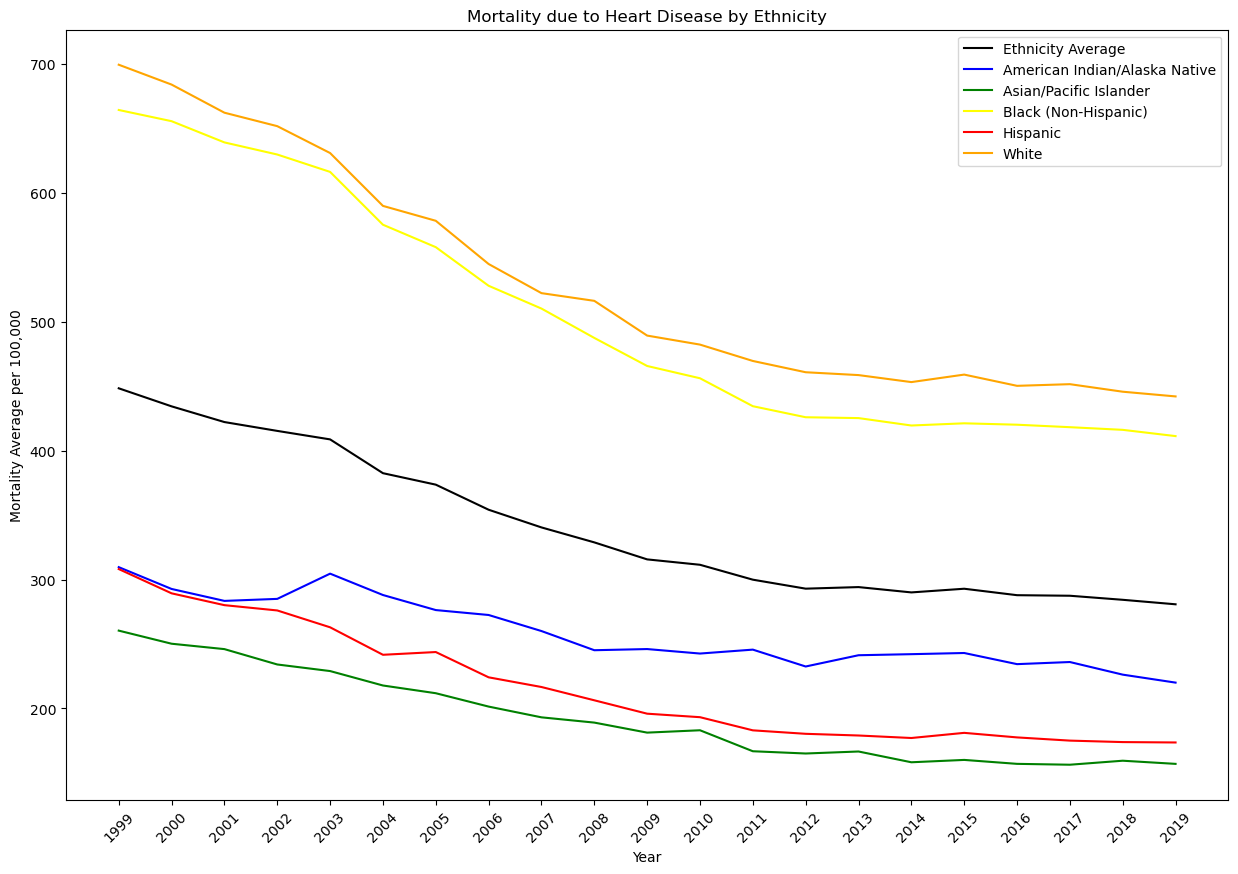

In [56]:
# Plot ethnicity data frame on a line plot
years = heart_by_ethnicity.keys()
ethnicity_trend = heart_by_ethnicity.mean()

plt.figure(figsize=(15,10))
ethnicity, = plt.plot(years, ethnicity_trend, color = "black", label = "Ethnicity Average")

American_Indian, = plt.plot(years, heart_by_ethnicity.loc["American Indian/Alaska Native", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="American Indian/Alaska Native")

Asian, = plt.plot(years, heart_by_ethnicity.loc["Asian/Pacific Islander", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="green", label="Asian/Pacific Islander")

Black, = plt.plot(years, heart_by_ethnicity.loc["Black (Non-Hispanic)", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="yellow", label="Black (Non-Hispanic)")

Hispanic, = plt.plot(years, heart_by_ethnicity.loc["Hispanic", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Hispanic")

White, = plt.plot(years, heart_by_ethnicity.loc["White", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="orange", label="White")

plt.legend(handles=[ethnicity, American_Indian, Asian, Black, Hispanic, White], loc="best")
plt.title("Mortality due to Heart Disease by Ethnicity")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.savefig('Charts/LG - Mortality due to Heart Disease by Ethnicity.png')
plt.show()

In [57]:
ethnicity_df = heart_study_ethnicity1.groupby(["Year", "Ethnicity"]).mean()["Data_Value"]
ethnicity_df = ethnicity_df.reset_index()
ethnicity_df

,Year,Ethnicity,Data_Value
0,1999,American Indian/Alaska Native,309.647124
1,1999,Asian/Pacific Islander,260.403617
2,1999,Black (Non-Hispanic),664.355559
3,1999,Hispanic,308.168737
4,1999,White,699.469520
...,...,...,...
100,2019,American Indian/Alaska Native,220.062667
101,2019,Asian/Pacific Islander,157.021935
102,2019,Black (Non-Hispanic),411.326325
103,2019,Hispanic,173.623047


<AxesSubplot:title={'center':'Data_Value'}, xlabel='Ethnicity'>

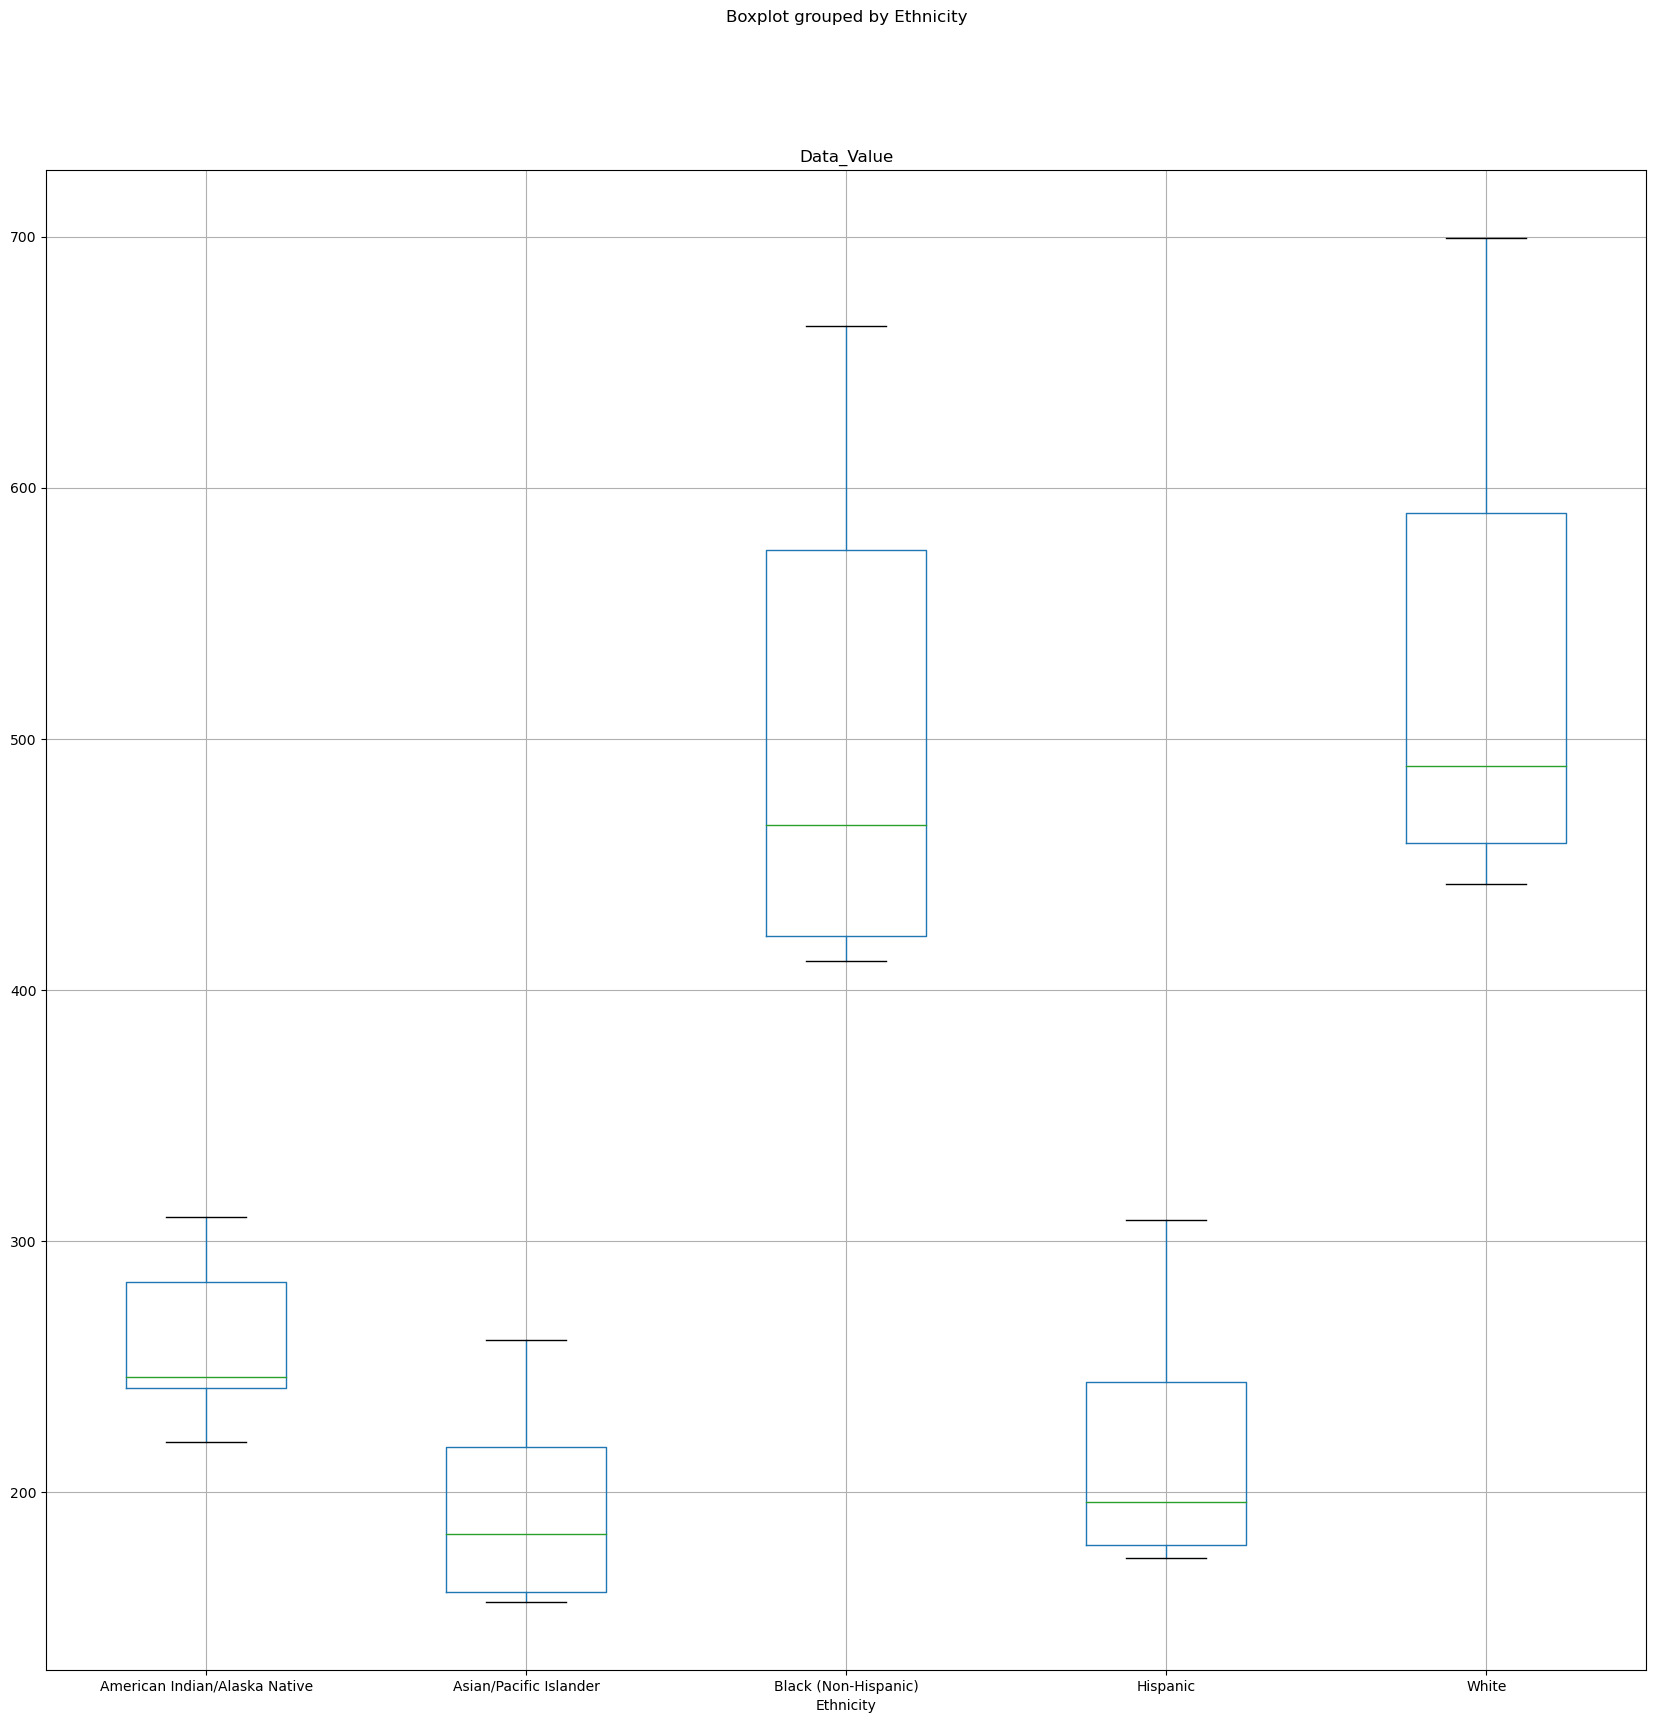

In [58]:
ethnicity_df.boxplot("Data_Value", by = "Ethnicity", figsize=(20,20))


In [59]:
# Extract individual groups
american_indian = ethnicity_df[ethnicity_df["Ethnicity"]== "American Indian/Alaska Native"]["Data_Value"]
asian = ethnicity_df[ethnicity_df["Ethnicity"]== "Asian/Pacific Islander"]["Data_Value"]
black = ethnicity_df[ethnicity_df["Ethnicity"]== "Black (Non-Hispanic)"]["Data_Value"]
hispanic = ethnicity_df[ethnicity_df["Ethnicity"]== "Hispanic"]["Data_Value"]
white = ethnicity_df[ethnicity_df["Ethnicity"]== "White"]["Data_Value"]

In [60]:
stats.f_oneway(american_indian, asian, black, hispanic, white)

F_onewayResult(statistic=138.44710943597417, pvalue=7.3307770787256145e-40)

Takeaway: The data is too widely varied, that this could be by chance or attributed to other factors not explored here. The p-value is too large to support the null hypothesis.

In [61]:
# Create dataframe by sex
heart_study_sex = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall")]

heart_by_sex = heart_study_sex.groupby(["Year", "Sex"]).mean()["Data_Value"]
heart_by_sex = heart_by_sex.unstack()
heart_by_sex = heart_by_sex.T
heart_by_sex

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Sex,,,,,,,,,,,,,,,,,,,,,
Men,829.355662,804.955001,775.794398,766.133699,738.548127,688.869743,676.105542,638.550811,609.096408,599.923685,...,566.806857,550.170653,539.658557,541.526926,535.005228,536.830749,530.413708,533.684784,527.753170,523.255516
Overall,700.612000,684.192580,663.015043,652.106568,631.975420,590.138575,578.539833,545.439401,523.330919,515.268345,...,481.302201,467.262993,458.296551,456.481379,450.153041,454.856296,446.344130,446.878552,441.026452,436.999542
Women,598.888721,585.558343,569.630800,559.143147,543.463951,507.767821,498.705812,467.862697,449.072654,442.021886,...,406.985069,396.296067,386.630703,381.703574,375.370861,381.287476,370.741328,368.873366,362.878624,358.926678


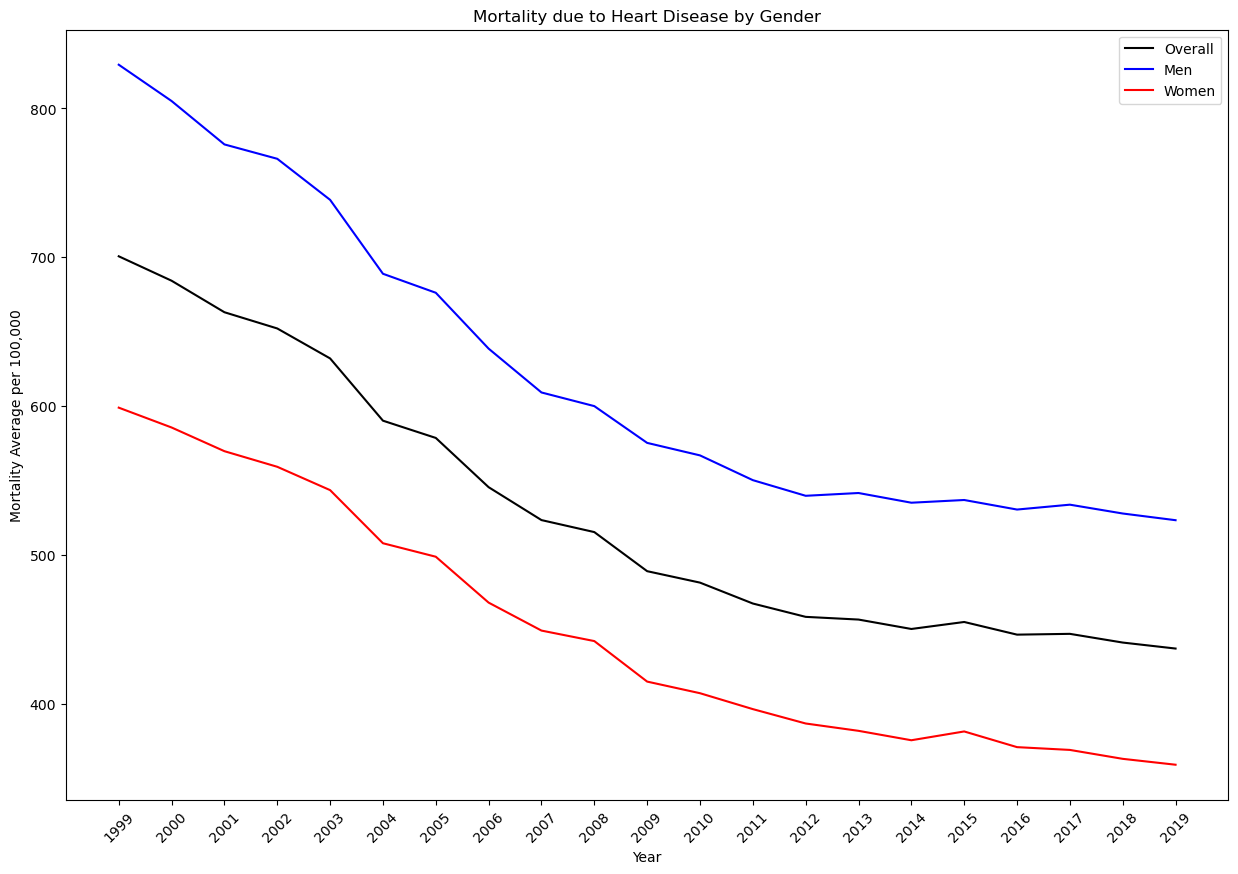

In [62]:
# Plot dataframe by sex
years = heart_by_sex.keys()

plt.figure(figsize=(15,10))
Overall, = plt.plot(years, heart_by_sex.loc["Overall", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="black", label="Overall")

Men, = plt.plot(years, heart_by_sex.loc["Men", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="Men")

Women, = plt.plot(years, heart_by_sex.loc["Women", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Women")

plt.legend(handles=[Overall, Men, Women], loc="best")
plt.title("Mortality due to Heart Disease by Gender")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.savefig('Charts/LG - Mortality due to Heart Disease by Gender.png')
plt.show()

In [63]:
# Create dataframe by age group
heart_study_age = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall")& 
                                                (heart_study_cleaned["Sex"] == "Overall")]

heart_by_age = heart_study_age.groupby(["Year", "Age Group"]).mean()["Data_Value"]
heart_by_age = heart_by_age.unstack()
heart_by_age = heart_by_age.T
heart_by_age

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Age Group,,,,,,,,,,,,,,,,,,,,,
Ages 35-64 years,87.650973,86.585178,84.235204,83.411525,81.862440,77.665049,76.642024,75.360551,73.066351,72.840123,...,70.764496,70.637944,71.215907,71.691651,73.201758,73.878190,74.504022,74.223587,74.485722,74.023192
Ages 65 years and older,1325.536209,1293.463506,1253.090949,1231.900853,1192.824975,1112.614065,1090.229960,1024.689762,982.380410,966.328598,...,899.849735,871.626429,852.929365,848.778578,834.458862,843.267507,825.439054,826.804233,814.718604,807.057771


In [64]:
# Confirm age group values
heart_study["Age Group"].unique()

array(['Ages 35-64 years', 'Ages 65 years and older'], dtype=object)

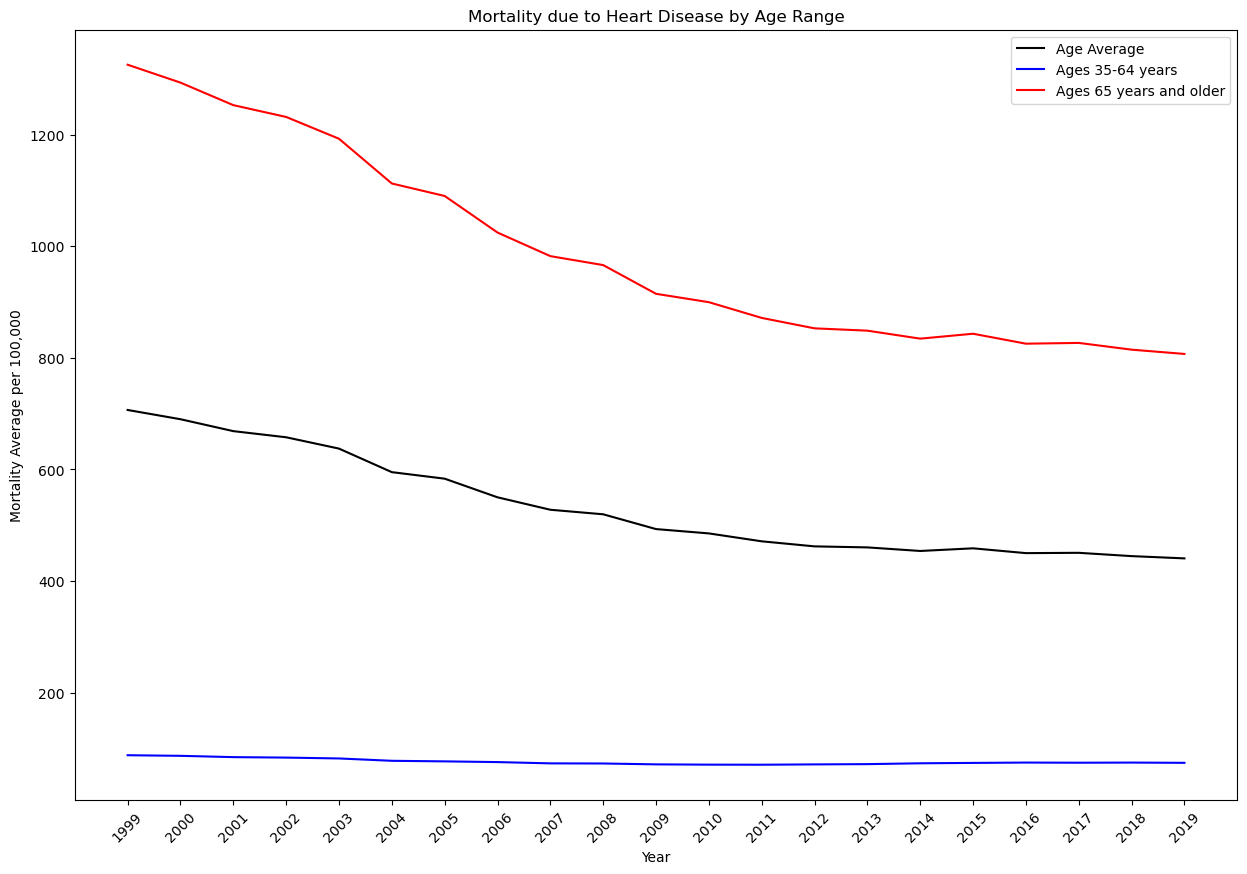

In [65]:
# Plot dataframe by age
years = heart_by_age.keys()
age_trend = heart_by_age.mean()

plt.figure(figsize=(15,10))
Age, = plt.plot(years, age_trend, color = "black", label = "Age Average")

Age35_64, = plt.plot(years, heart_by_age.loc["Ages 35-64 years", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="Ages 35-64 years")

Age65, = plt.plot(years, heart_by_age.loc["Ages 65 years and older", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Ages 65 years and older")

plt.legend(handles=[Age, Age35_64, Age65], loc="best")
plt.title("Mortality due to Heart Disease by Age Range")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.savefig('Charts/LG - Mortality due to Heart Disease by Age Range.png')
plt.show()

### Integrate census data created from Census API

In [66]:
# Import Population Census CSV

census_data = pd.read_csv("Output/final_census_data_2000-2019.csv",dtype={"Year": "str"})
census_data = census_data.drop("Unnamed: 0", axis = 1)
census_data

,Year,County,Population Estimate,Unnamed: 0.1,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE
0,2000,Atlantic,253674,1.0,9.5,2.0,23804.0,4991.0
1,2001,Atlantic,255737,2.0,9.7,2.1,24621.0,5281.0
2,2002,Atlantic,259263,3.0,10.1,2.2,26111.0,5785.0
3,2003,Atlantic,263285,4.0,10.8,2.4,28422.0,6296.0
4,2004,Atlantic,267723,5.0,10.0,2.3,26674.0,6133.0
...,...,...,...,...,...,...,...,...
352,2012,Warren,107563,373.0,6.9,1.4,7285.0,1441.0
353,2013,Warren,106897,374.0,8.7,1.5,9194.0,1551.0
354,2014,Warren,106981,375.0,8.3,1.5,8747.0,1594.0
355,2015,Warren,106742,376.0,7.7,1.4,8040.0,1478.0


In [67]:
# Calculate values and append dataframe to include these values
adjusted_pop = census_data["Population Estimate"]/100000
census_data["Adjusted Population"] = adjusted_pop
census_data = census_data[["Year", "County", "Population Estimate", "Adjusted Population", "Poverty Rate",
                          "Poverty Rate MOE", "Poverty Count Estimate", "Poverty Count MOE"]]
census_data

,Year,County,Population Estimate,Adjusted Population,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE
0,2000,Atlantic,253674,2.53674,9.5,2.0,23804.0,4991.0
1,2001,Atlantic,255737,2.55737,9.7,2.1,24621.0,5281.0
2,2002,Atlantic,259263,2.59263,10.1,2.2,26111.0,5785.0
3,2003,Atlantic,263285,2.63285,10.8,2.4,28422.0,6296.0
4,2004,Atlantic,267723,2.67723,10.0,2.3,26674.0,6133.0
...,...,...,...,...,...,...,...,...
352,2012,Warren,107563,1.07563,6.9,1.4,7285.0,1441.0
353,2013,Warren,106897,1.06897,8.7,1.5,9194.0,1551.0
354,2014,Warren,106981,1.06981,8.3,1.5,8747.0,1594.0
355,2015,Warren,106742,1.06742,7.7,1.4,8040.0,1478.0


In [68]:
nj_by_county1 = nj_study.groupby(["Year", "County"]).mean()["Data_Value"]

In [69]:
# Merge Census Data with Heart Study Data
nj_census_merged = pd.merge(census_data, nj_by_county1, how = "left", on = ["Year", "County"])
nj_census_merged

,Year,County,Population Estimate,Adjusted Population,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value
0,2000,Atlantic,253674,2.53674,9.5,2.0,23804.0,4991.0,802.100000
1,2001,Atlantic,255737,2.55737,9.7,2.1,24621.0,5281.0,768.306667
2,2002,Atlantic,259263,2.59263,10.1,2.2,26111.0,5785.0,750.036667
3,2003,Atlantic,263285,2.63285,10.8,2.4,28422.0,6296.0,765.923333
4,2004,Atlantic,267723,2.67723,10.0,2.3,26674.0,6133.0,705.653333
...,...,...,...,...,...,...,...,...,...
352,2012,Warren,107563,1.07563,6.9,1.4,7285.0,1441.0,471.370000
353,2013,Warren,106897,1.06897,8.7,1.5,9194.0,1551.0,458.546667
354,2014,Warren,106981,1.06981,8.3,1.5,8747.0,1594.0,449.753333
355,2015,Warren,106742,1.06742,7.7,1.4,8040.0,1478.0,468.546667


In [70]:
# Calculate Heart Disease per County (adjusted for population)
total_heart_instances = nj_census_merged["Data_Value"] * nj_census_merged["Adjusted Population"]
percentage_heart_instances = nj_census_merged["Data_Value"]/100000
nj_census_merged["Total Mortality Instances"] = total_heart_instances
nj_census_merged["Percentage of Heart Instances"] = percentage_heart_instances
nj_census_merged = nj_census_merged[["Year", "County", "Population Estimate", "Poverty Rate", "Poverty Rate MOE", 
                                     "Poverty Count Estimate", "Poverty Count MOE", "Data_Value", "Adjusted Population",
                                    "Total Mortality Instances", "Percentage of Heart Instances"]]
nj_census_merged.head(20)

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
0,2000,Atlantic,253674,9.5,2.00,23804.0,4991.0,802.100000,2.53674,2034.719154,0.008021
1,2001,Atlantic,255737,9.7,2.10,24621.0,5281.0,768.306667,2.55737,1964.844420,0.007683
2,2002,Atlantic,259263,10.1,2.20,26111.0,5785.0,750.036667,2.59263,1944.567563,0.007500
3,2003,Atlantic,263285,10.8,2.40,28422.0,6296.0,765.923333,2.63285,2016.561248,0.007659
4,2004,Atlantic,267723,10.0,2.30,26674.0,6133.0,705.653333,2.67723,1889.196274,0.007057
5,2005,Atlantic,270332,9.4,1.35,24852.0,3513.0,674.213333,2.70332,1822.614388,0.006742
6,2006,Atlantic,271759,9.5,1.30,25264.0,3456.0,594.873333,2.71759,1616.621822,0.005949
7,2007,Atlantic,272303,11.9,1.60,31488.0,4159.0,560.886667,2.72303,1527.311220,0.005609
8,2008,Atlantic,273014,11.1,1.45,29498.0,3720.0,544.436667,2.73014,1486.388321,0.005444
9,2009,Atlantic,274049,10.9,1.60,28926.0,4342.0,509.480000,2.74049,1396.224845,0.005095


In [71]:
# Sort Data by Data_Value to determine the counties with the highest instances of mortality (when adjusted for population)
sorted_nj_census = nj_census_merged.sort_values(by = ["Data_Value", "County"], ascending = False)
sorted_nj_census.head(20)

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
85,2000,Cumberland,146263,13.7,2.95,18649.0,3971.0,818.343333,1.46263,1196.933510,0.008183
272,2000,Salem,64177,8.4,1.85,5326.0,1167.0,804.183333,0.64177,516.100738,0.008042
0,2000,Atlantic,253674,9.5,2.00,23804.0,4991.0,802.100000,2.53674,2034.719154,0.008021
86,2001,Cumberland,146451,13.9,3.00,18962.0,4152.0,791.993333,1.46451,1159.882157,0.007920
273,2001,Salem,64069,8.1,1.80,5139.0,1140.0,775.016667,0.64069,496.545428,0.007750
1,2001,Atlantic,255737,9.7,2.10,24621.0,5281.0,768.306667,2.55737,1964.844420,0.007683
88,2003,Cumberland,148437,14.9,3.35,20963.0,4719.0,768.050000,1.48437,1140.070378,0.007680
3,2003,Atlantic,263285,10.8,2.40,28422.0,6296.0,765.923333,2.63285,2016.561248,0.007659
87,2002,Cumberland,147294,14.5,3.25,20010.0,4527.0,760.766667,1.47294,1120.563654,0.007608
119,2000,Gloucester,256524,5.9,1.25,15054.0,3170.0,759.710000,2.56524,1948.838480,0.007597


In [72]:
# Create dataframe with Top 5 with highest mortality: Cumberland, Salem, Atlantic, Gloucester, Sussex
top_5 = nj_census_merged.loc[(nj_census_merged["County"] == "Atlantic") |
                            (nj_census_merged["County"] == "Cumberland")|
                            (nj_census_merged["County"] == "Gloucester") |
                            (nj_census_merged["County"] == "Salem") |
                            (nj_census_merged["County"] == "Sussex")]
top_5

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
0,2000,Atlantic,253674,9.5,2.0,23804.0,4991.0,802.100000,2.53674,2034.719154,0.008021
1,2001,Atlantic,255737,9.7,2.1,24621.0,5281.0,768.306667,2.55737,1964.844420,0.007683
2,2002,Atlantic,259263,10.1,2.2,26111.0,5785.0,750.036667,2.59263,1944.567563,0.007500
3,2003,Atlantic,263285,10.8,2.4,28422.0,6296.0,765.923333,2.63285,2016.561248,0.007659
4,2004,Atlantic,267723,10.0,2.3,26674.0,6133.0,705.653333,2.67723,1889.196274,0.007057
...,...,...,...,...,...,...,...,...,...,...,...
318,2012,Sussex,146979,6.2,1.1,9018.0,1568.0,474.996667,1.46979,698.145351,0.004750
319,2013,Sussex,145639,6.1,1.1,8779.0,1526.0,472.450000,1.45639,688.071456,0.004724
320,2014,Sussex,144593,6.2,1.1,8875.0,1641.0,448.376667,1.44593,648.321274,0.004484
321,2015,Sussex,143004,5.6,1.1,7958.0,1617.0,438.956667,1.43004,627.725592,0.004390


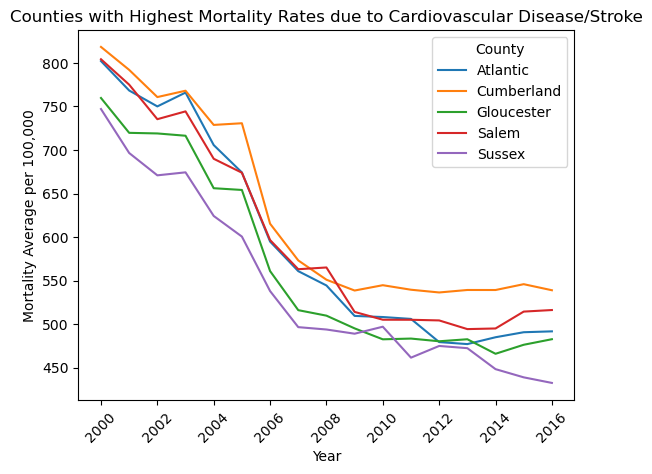

In [73]:
# Plot Graph with Top 5 with highest mortality: Cumberland, Salem, Atlantic, Gloucester, Sussex
top_5.pivot_table(values="Data_Value",index="Year",columns="County").plot()

plt.title("Counties with Highest Mortality Rates due to Cardiovascular Disease/Stroke")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.savefig('Charts/LG - Counties with Highest Mortality Rates due to Cardiovascular Disease or Stroke.png')
plt.show()

Takeaway: Four of the five lowest counties are in the South-Western part of the state of New Jersey, and the remaining county is in the uppermost northwestern region. These counties collectively are arguably farthest away from most of the cities, and some of the most rural and sparse portions of New Jersey. This could indicate that distance from medical care and lower population densities resulted in poorer outcomes for it's residents. Further analysis, however, is required to determine the other compounding factors for these regions.

In [74]:
# Sort Data by Data_Value to determine the counties with the lowest instances of mortality (when adjusted for population)
sorted_nj_census = nj_census_merged.sort_values(by = ["Data_Value", "County"], ascending = True)
sorted_nj_census.head(25)

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
169,2016,Hunterdon,124775,4.5,0.80,5431.0,921.0,335.410000,1.24775,418.507827,0.003354
167,2014,Hunterdon,125835,4.7,0.90,5742.0,1144.0,339.253333,1.25835,426.899432,0.003393
166,2013,Hunterdon,126376,4.1,0.90,5068.0,1091.0,348.656667,1.26376,440.618349,0.003487
164,2011,Hunterdon,127330,4.3,0.90,5370.0,1162.0,348.830000,1.27330,444.165239,0.003488
168,2015,Hunterdon,125452,5.0,0.90,6046.0,1085.0,351.560000,1.25452,441.039051,0.003516
33,2016,Bergen,928120,6.9,0.70,63789.0,6215.0,352.096667,9.28120,3267.879583,0.003521
305,2016,Somerset,329875,5.2,0.90,17318.0,2858.0,353.010000,3.29875,1164.491737,0.003530
303,2014,Somerset,329329,5.0,1.00,16496.0,3368.0,356.773333,3.29329,1174.958051,0.003568
237,2016,Morris,493801,5.4,0.80,26615.0,4134.0,358.270000,4.93801,1769.140843,0.003583
32,2015,Bergen,926391,7.1,0.80,65906.0,7290.0,359.180000,9.26391,3327.411194,0.003592


In [75]:
# Create Dataframe with Top 5 with lowest mortality: Hunterdon, Bergen, Somerset, Morris, Mercer
bottom_5 = nj_census_merged.loc[(nj_census_merged["County"] == "Bergen") |
                            (nj_census_merged["County"] == "Hunterdon")|
                            (nj_census_merged["County"] == "Mercer") |
                            (nj_census_merged["County"] == "Morris") |
                            (nj_census_merged["County"] == "Somerset")]
bottom_5

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
17,2000,Bergen,885180,5.0,1.05,43810.0,9152.0,632.936667,8.85180,5602.628786,0.006329
18,2001,Bergen,888782,5.2,1.10,46185.0,9863.0,588.116667,8.88782,5227.075072,0.005881
19,2002,Bergen,890647,5.7,1.25,50601.0,11145.0,585.593333,8.90647,5215.569456,0.005856
20,2003,Bergen,892214,6.1,1.30,54900.0,11903.0,548.466667,8.92214,4893.496385,0.005485
21,2004,Bergen,893378,5.7,1.25,50815.0,11427.0,503.983333,8.93378,4502.476224,0.005040
...,...,...,...,...,...,...,...,...,...,...,...
301,2012,Somerset,327407,6.1,0.90,19644.0,2842.0,375.570000,3.27407,1229.642470,0.003756
302,2013,Somerset,329047,5.7,1.00,18582.0,3347.0,364.150000,3.29047,1198.224650,0.003641
303,2014,Somerset,329329,5.0,1.00,16496.0,3368.0,356.773333,3.29329,1174.958051,0.003568
304,2015,Somerset,329626,5.5,1.00,18132.0,3281.0,371.056667,3.29626,1223.099248,0.003711


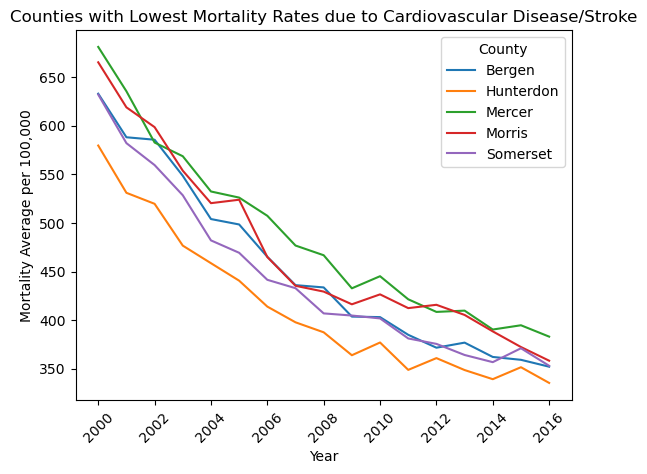

In [76]:
# Plot Graph with Top 5 with lowest mortality: Hunterdon, Bergen, Somerset, Morris, Mercer
bottom_5.pivot_table(values="Data_Value",index="Year",columns="County").plot()

plt.title("Counties with Lowest Mortality Rates due to Cardiovascular Disease/Stroke")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.savefig('Charts/LG - Counties with Lowest Mortality Rates due to Cardiovascular Disease or Stroke.png')
plt.show()

Takeaway: These counties have varying degrees of density, but on the whole are more centrally located in this state. This puts them in closer proximity to healthcare. Moreover, several of these counties tend to have lower poverty rates. All of these factors may indicate why there are lower mortality rates due to heart disease, but further analysis, however, is required to determine the other compounding factors for these regions.

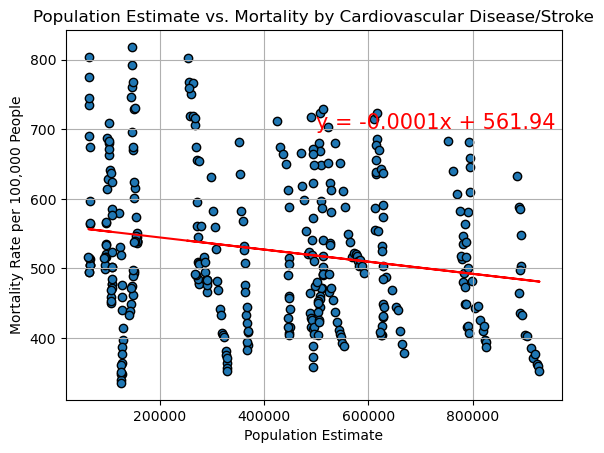

In [77]:
# Create scatterplot to compare Population Size to Mortality Rate
# Establish variables for plotting poverty comparison
x_values = nj_census_merged["Population Estimate"]
y_values = nj_census_merged["Data_Value"]

# Create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

# Plot Scatterplot
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (500000, 700), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Population Estimate vs. Mortality by Cardiovascular Disease/Stroke")
plt.ylabel("Mortality Rate per 100,000 People")
plt.xlabel("Population Estimate")
plt.grid(True)

# Save the figure
plt.savefig("Charts/LG - Population Estimate vs. Mortality by Cardiovascular Disease or Stroke.png")

plt.show()


Takeaway: While the graph shows a steep regression line, the annotated equation provides greater context that the slope is actually not significant. It only appears that way due to the large scale of the x axis, which spans near 1,000,000 (due to the population sizes of the various counties). This demonstrates that the population size of a county does not affect the county's mortality rate.

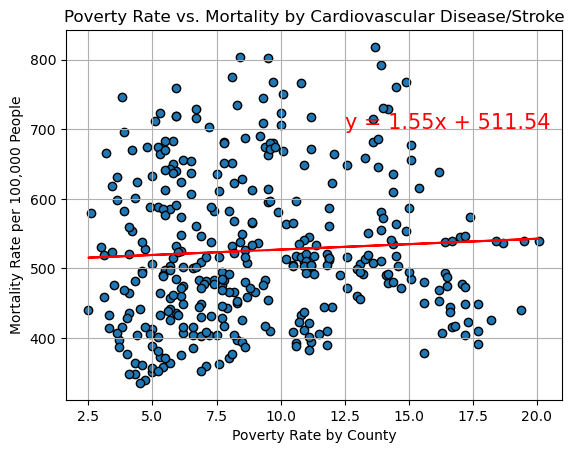

In [78]:
# Create scatterplot to compare Poverty Rate to Mortality Rate
# Establish variables for plotting poverty comparison
x_values = nj_census_merged["Poverty Rate"]
y_values = nj_census_merged["Data_Value"]

# Create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Scatterplot
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (12.5, 700), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Poverty Rate vs. Mortality by Cardiovascular Disease/Stroke")
plt.ylabel("Mortality Rate per 100,000 People")
plt.xlabel("Poverty Rate by County")
plt.grid(True)

# Save the figure
plt.savefig("Charts/LG - Poverty Rate vs. Mortality by Cardiovascular Disease or Stroke.png")

plt.show()

Takeaway: While the regression line does not appear to have a strong slope, it is still indicated on the annotated equation that there is a relationship between a county's poverty rate and mortality due to cardiovascular disease/stroke. This makes sense, as poverty often causes additional stress, limits an individual's access to healthy food and likely healthcare. All of these factors make an individual more suceptible to heart disease, but further study and statistical analysis is required to better understand the relationship between the two.